In [1]:
import os
import copy
import torch
import json
import time
import math
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import numpy as np
import random
from scipy.stats import wilcoxon

import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm
#from mlxtend.plotting import plot_decision_regions
from gpolnel.utils.tree import Tree
from gpolnel.problems.inductive_programming import SML
#from gpolnel.utils.utils import train_test_split
from gpolnel.utils.ffunctions import Ffunctions
from gpolnel.utils.tree import Tree
from gpolnel.utils.inductive_programming import function_map, _get_tree_depth
from gpolnel.algorithms.genetic_algorithm import GeneticAlgorithm, GSGP
from gpolnel.operators.initializers import grow
from gpolnel.problems.problem import Problem
from gpolnel.operators.selectors import prm_tournament
from gpolnel.operators.variators import prm_efficient_gs_mtn
import codecs
import neat

#from gpolnel.operators.variators import prm_efficient_gs_mtn
#from gpolnel.operators.selectors import prm_tournament

In [2]:
data = pd.read_csv("data_project_nel.csv")
y_fat = pd.read_csv("y_fat.csv")
y_lactose = pd.read_csv("y_lactose.csv")
y_protein = pd.read_csv("y_protein.csv")

In [3]:
data.head()

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2


In [4]:
data.shape

(324, 14)

In [5]:
y_fat.head()

,fat_percent
0,3.787156
1,3.645519
2,3.458251
3,3.407140
4,4.902554


In [6]:
y_fat.shape

(324, 1)

In [7]:
y_lactose.head()

,lactose_percent
0,4.953503
1,4.983128
2,4.889104
3,4.868969
4,4.845402


In [8]:
y_lactose.shape

(324, 1)

In [9]:
y_protein.head()

,protein_percent
0,3.511685
1,3.470806
2,3.370124
3,3.221164
4,3.395152


In [10]:
y_protein.shape

(324, 1)

In [11]:
data = pd.concat([data, y_lactose, y_fat, y_protein], axis=1)

In [12]:
data.head()

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg,lactose_percent,fat_percent,protein_percent
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0,4.953503,3.787156,3.511685
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0,4.983128,3.645519,3.470806
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8,4.889104,3.458251,3.370124
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2,4.868969,3.407140,3.221164
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2,4.845402,4.902554,3.395152


In [13]:
data.isnull().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
lactose_percent               0
fat_percent                   0
protein_percent               0
dtype: int64

In [14]:
data.drop('dry_days', axis=1, inplace=True)

C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

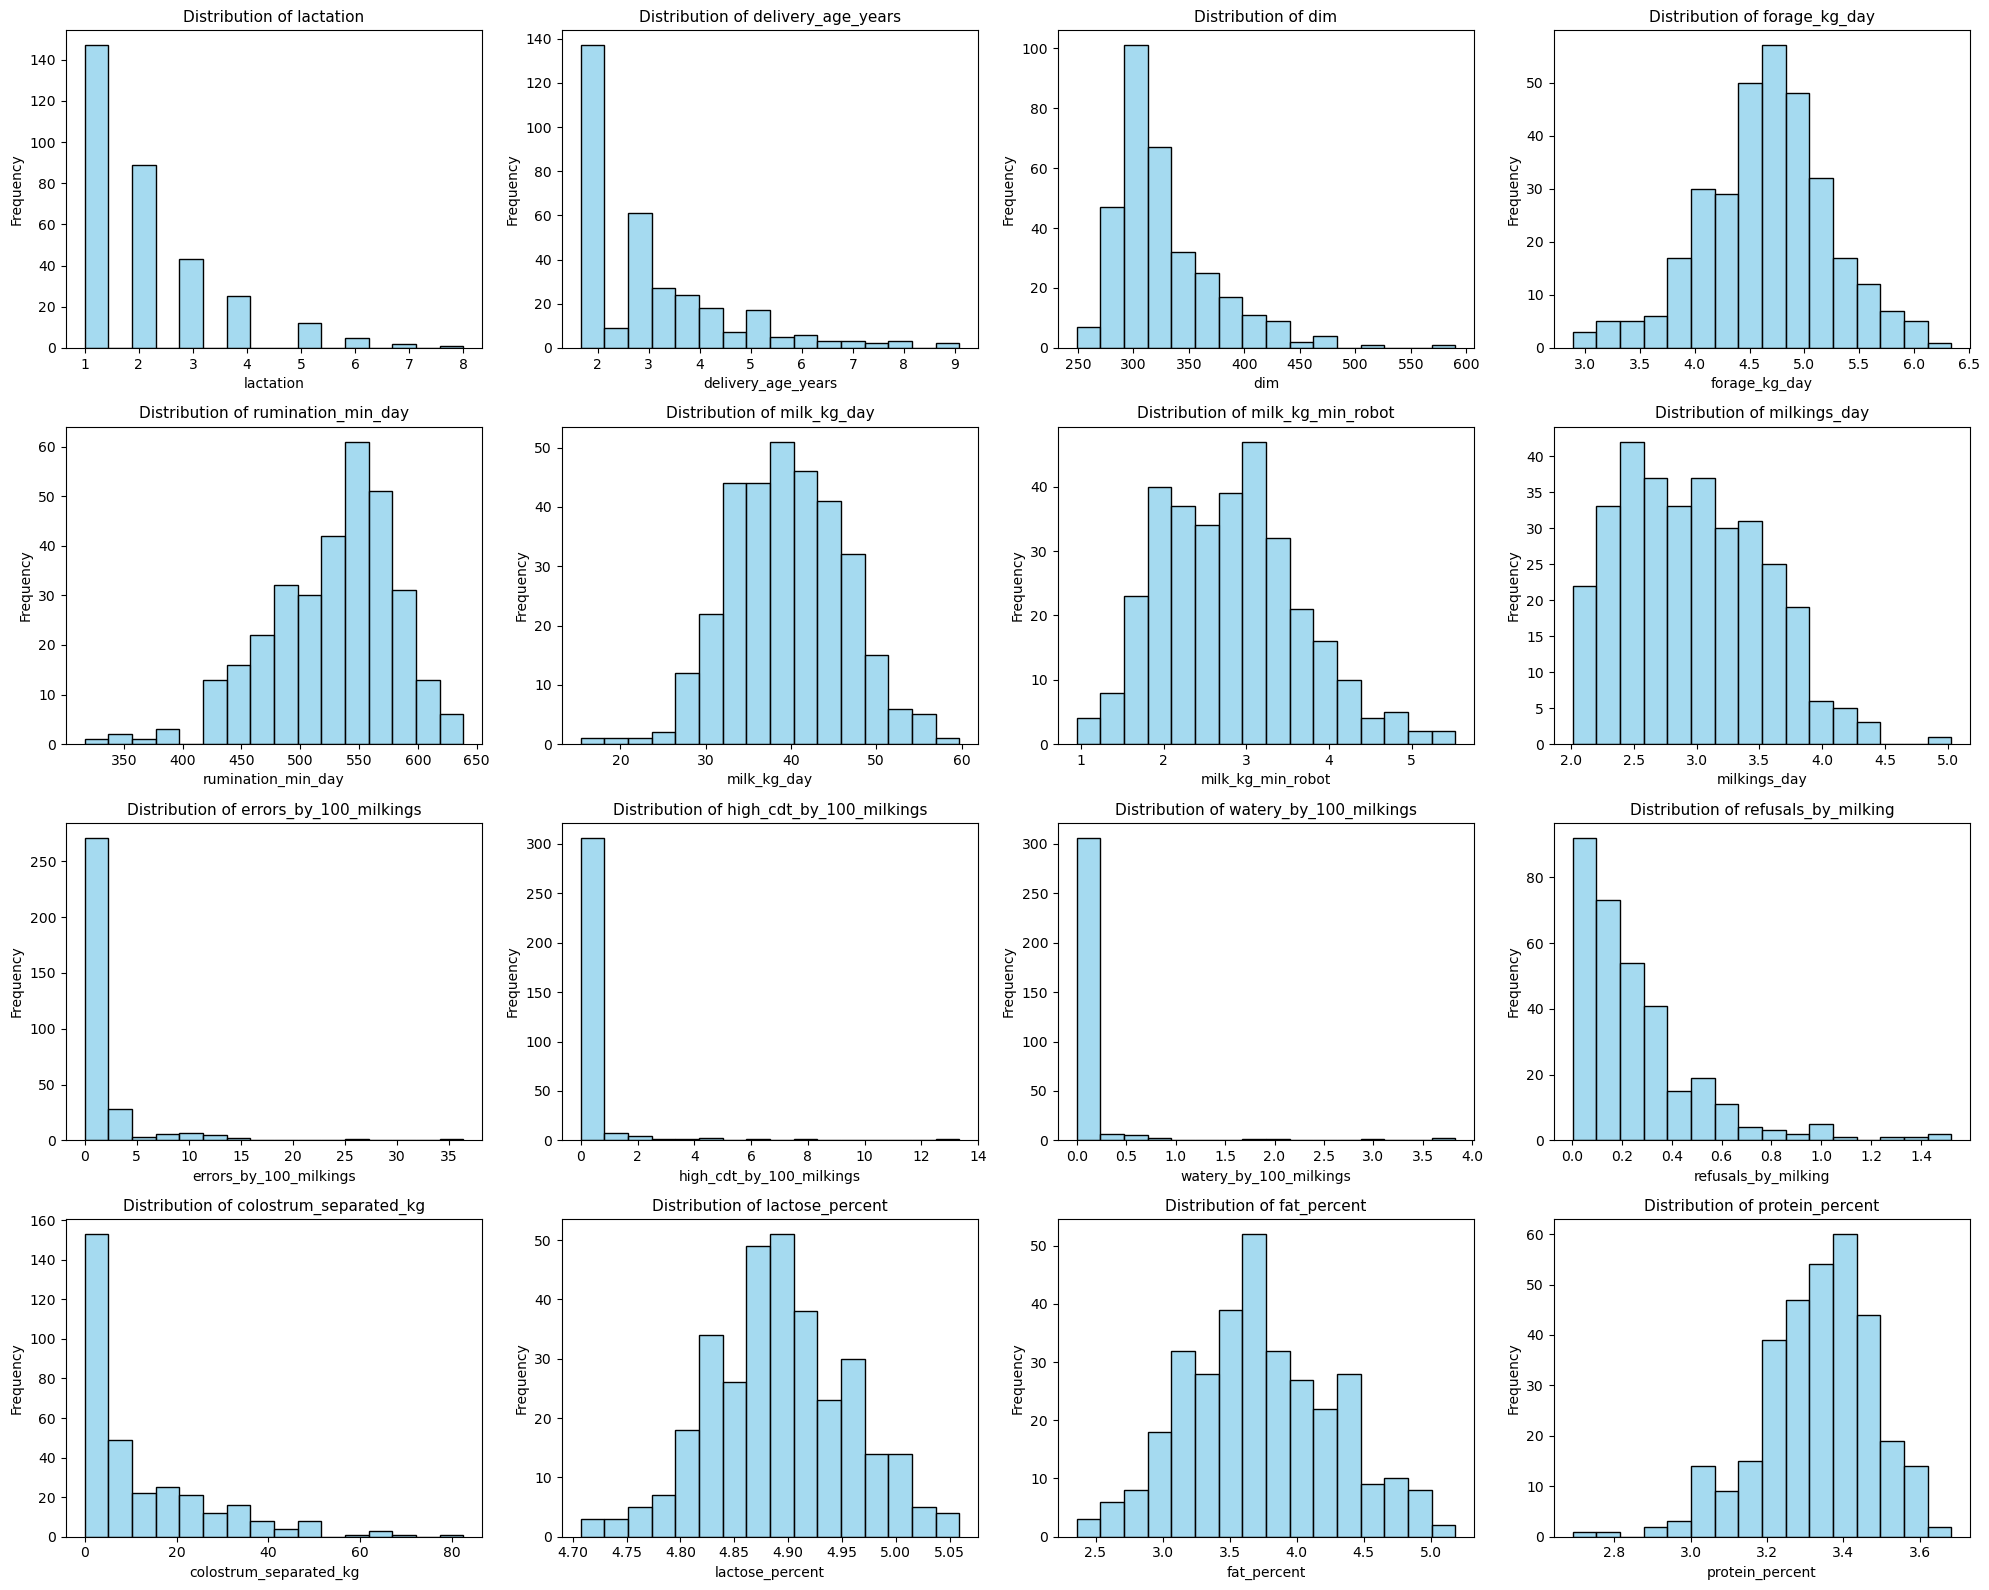

In [15]:
num_columns = len(data.columns)

# Number of rows and columns for subplots
n_rows = 4
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(data.columns):
    sns.histplot(data[column], bins=16, kde=False, color='skyblue', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=11)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
#lactation is categorical so we did one hot encoding here
data = pd.get_dummies(data, columns=['lactation'])
data.iloc[:, -7:] = data.iloc[:, -7:].astype(int)

In [17]:
data.head()

,delivery_age_years,dim,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,...,fat_percent,protein_percent,lactation_1,lactation_2,lactation_3,lactation_4,lactation_5,lactation_6,lactation_7,lactation_8
0,7.750000,414,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,...,3.787156,3.511685,False,0,0,0,0,0,1,0
1,9.083333,357,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,...,3.645519,3.470806,False,0,0,0,0,0,0,1
2,7.666667,315,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,...,3.458251,3.370124,False,0,0,0,0,1,0,0
3,8.666667,362,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,...,3.407140,3.221164,False,0,0,0,0,0,1,0
4,6.500000,427,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,...,4.902554,3.395152,False,0,0,0,1,0,0,0


In [18]:
spearman_corr_matrix = data.corr(method='spearman')

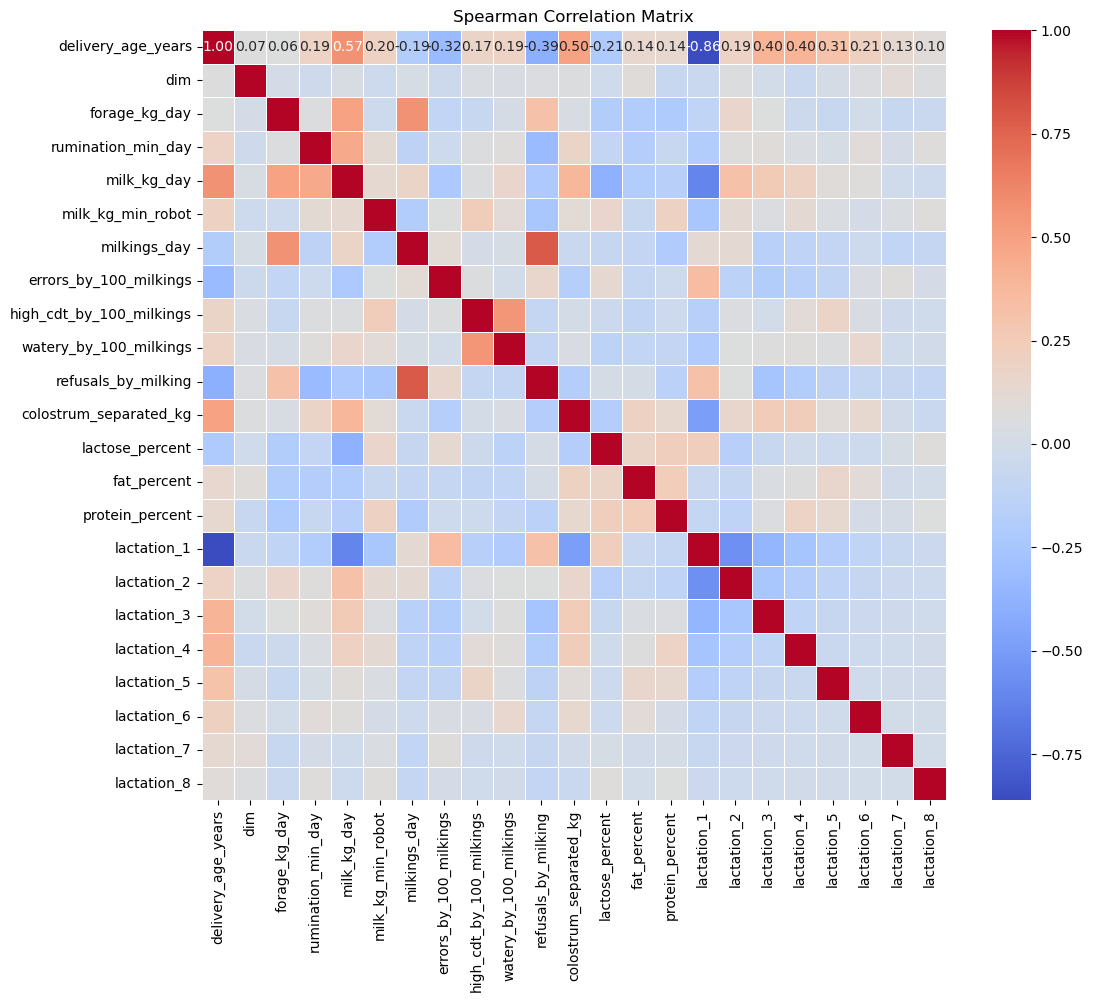

In [19]:
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Spearman Correlation Matrix')
plt.show()

C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaime\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

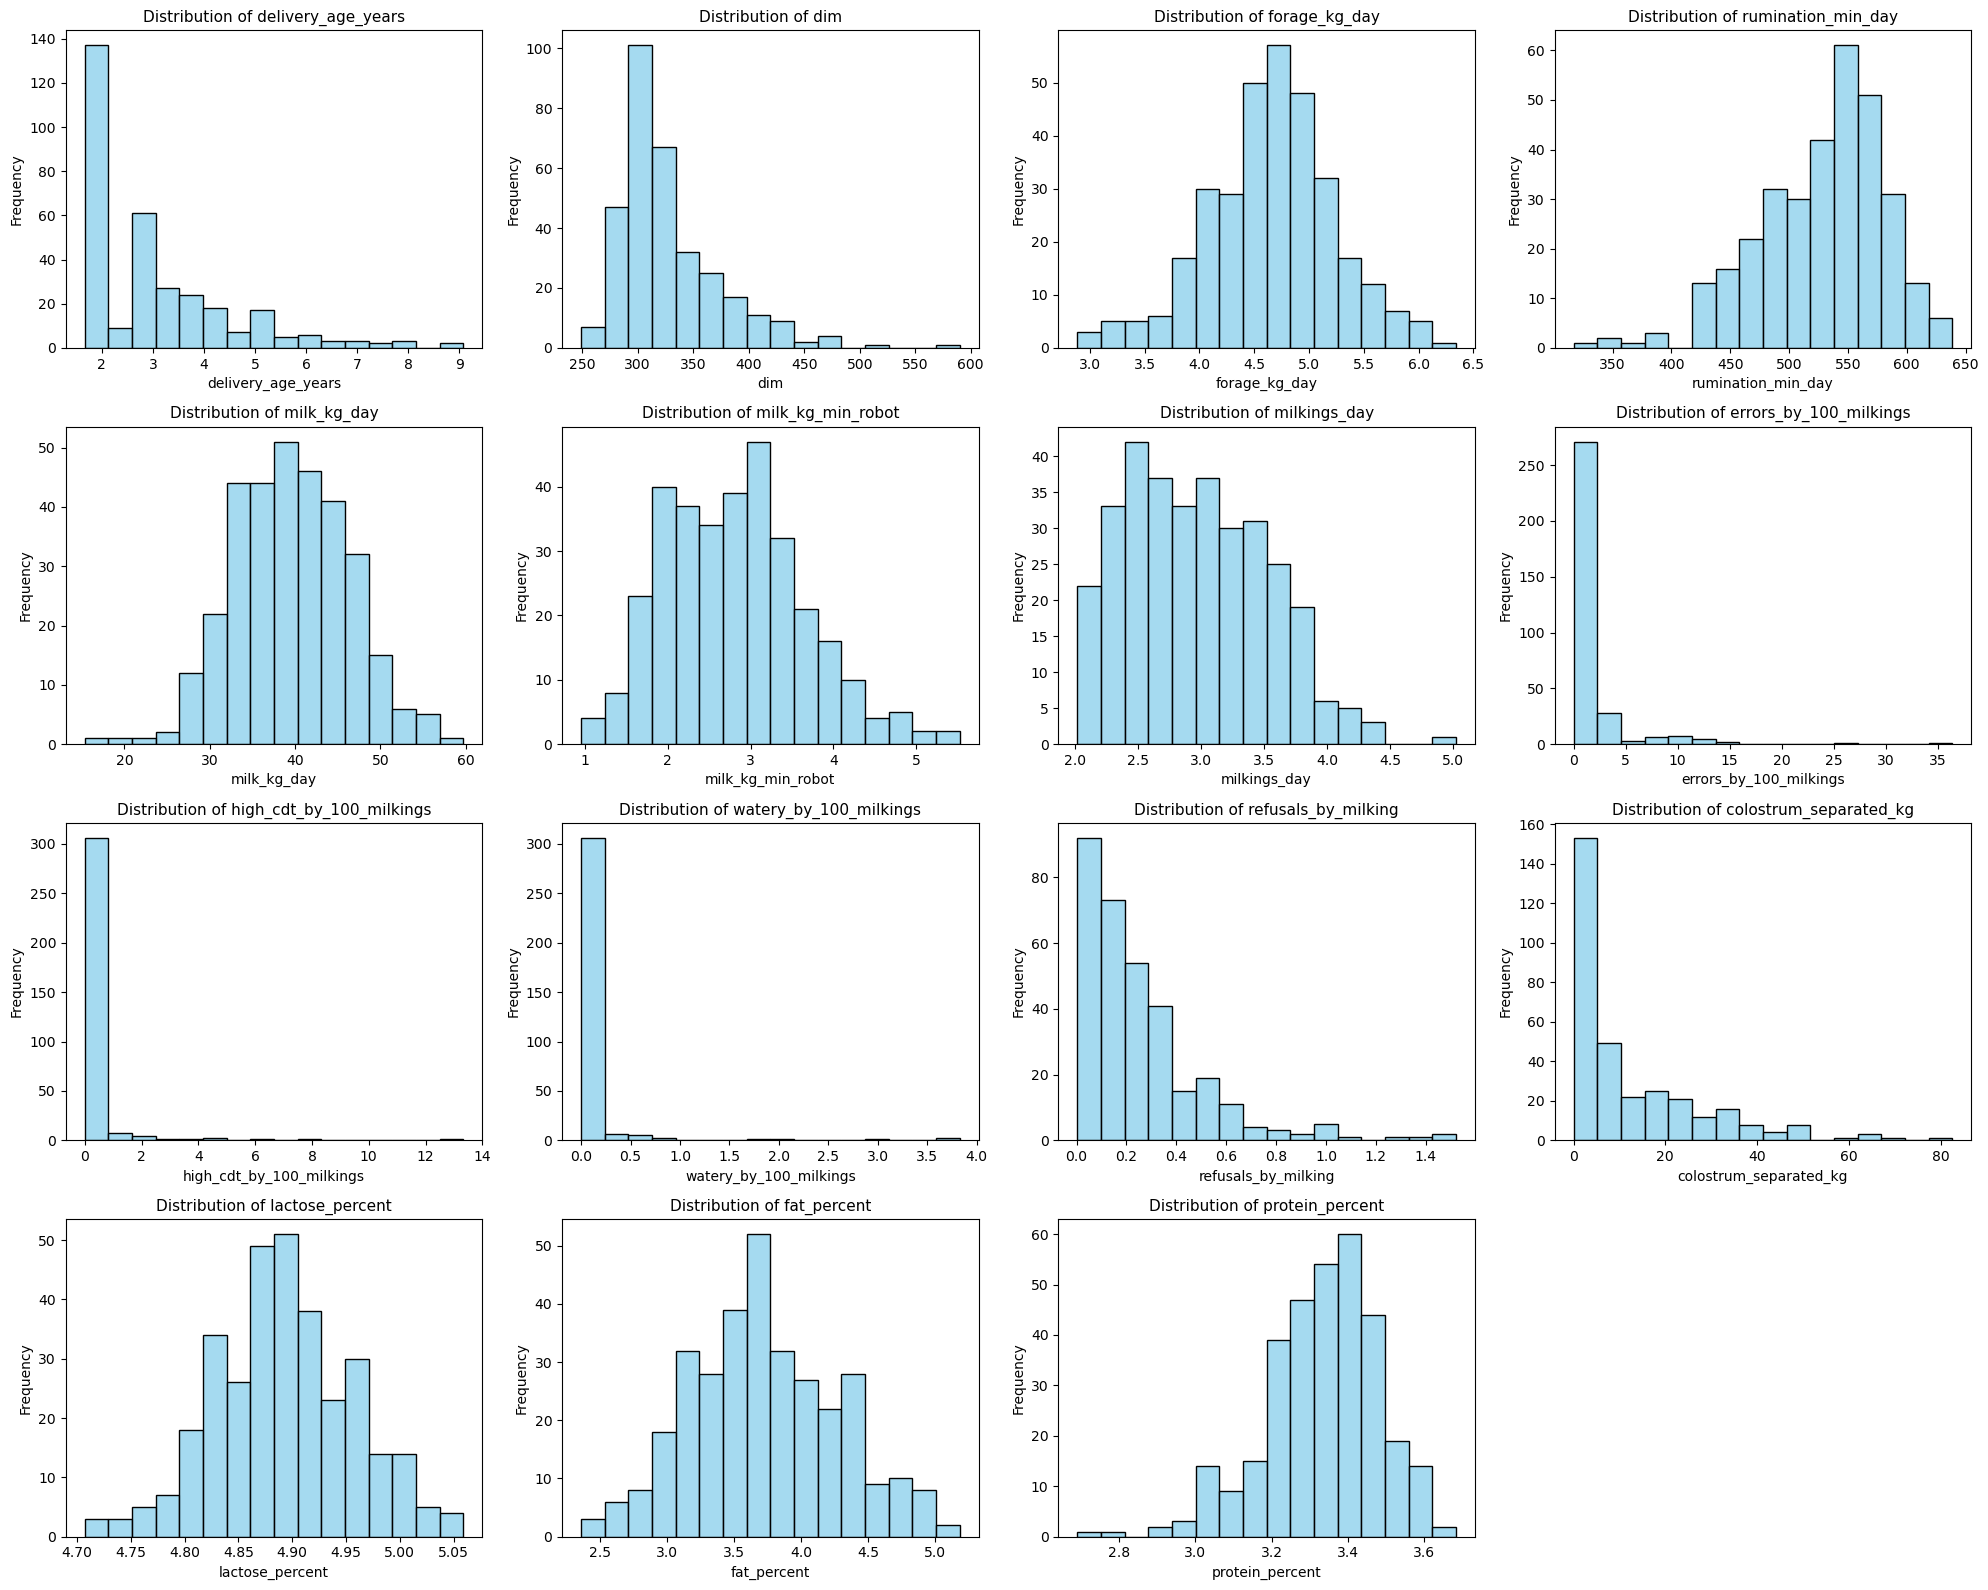

In [20]:
columns_to_plot = [col for col in data.columns if not col.startswith('lactation_')]

num_columns = len(columns_to_plot)

n_rows = 4
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 16))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], bins=16, kde=False, color='skyblue', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=11)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
X = data.drop(columns=["fat_percent", "lactose_percent", "protein_percent"])
y_fat = data["fat_percent"]
y_lactose = data["lactose_percent"]
y_protein = data["protein_percent"]

In [22]:
k = 5  
kf = KFold(n_splits=k, shuffle=True, random_state=42)

scaler = StandardScaler()

X_train_kf, X_val_kf = [], []
y_fat_train_kf, y_fat_val_kf = [], []
y_lactose_train_kf, y_lactose_val_kf = [], []
y_protein_train_kf, y_protein_val_kf = [], []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_fat_train_fold, y_fat_val_fold = y_fat.iloc[train_index], y_fat.iloc[val_index]
    y_lactose_train_fold, y_lactose_val_fold = y_lactose.iloc[train_index], y_lactose.iloc[val_index]
    y_protein_train_fold, y_protein_val_fold = y_protein.iloc[train_index], y_protein.iloc[val_index]

    # Scaler
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)
    X_val_fold_scaled = scaler.transform(X_val_fold)

    # Convert to PyTorch tensors
    X_train_fold_tensor = torch.tensor(X_train_fold_scaled, dtype=torch.float32)
    X_val_fold_tensor = torch.tensor(X_val_fold_scaled, dtype=torch.float32)
    y_fat_train_fold_tensor = torch.tensor(y_fat_train_fold.to_numpy(), dtype=torch.float32).view(-1, 1)
    y_fat_val_fold_tensor = torch.tensor(y_fat_val_fold.to_numpy(), dtype=torch.float32).view(-1, 1)
    y_lactose_train_fold_tensor = torch.tensor(y_lactose_train_fold.to_numpy(), dtype=torch.float32).view(-1, 1)
    y_lactose_val_fold_tensor = torch.tensor(y_lactose_val_fold.to_numpy(), dtype=torch.float32).view(-1, 1)
    y_protein_train_fold_tensor = torch.tensor(y_protein_train_fold.to_numpy(), dtype=torch.float32).view(-1, 1)
    y_protein_val_fold_tensor = torch.tensor(y_protein_val_fold.to_numpy(), dtype=torch.float32).view(-1, 1)

    # Append to lists
    X_train_kf.append(X_train_fold_tensor)
    X_val_kf.append(X_val_fold_tensor)
    y_fat_train_kf.append(y_fat_train_fold_tensor)
    y_fat_val_kf.append(y_fat_val_fold_tensor)
    y_lactose_train_kf.append(y_lactose_train_fold_tensor)
    y_lactose_val_kf.append(y_lactose_val_fold_tensor)
    y_protein_train_kf.append(y_protein_train_fold_tensor)
    y_protein_val_kf.append(y_protein_val_fold_tensor)

In [23]:
def dataloaders(X_train_kf, X_val_kf, y_train_kf, y_val_kf, batch_sizes):
    train_data = []
    val_data = []

    for i in range(len(X_train_kf)):
        train_ds = TensorDataset(X_train_kf[i], y_train_kf[i])
        val_ds = TensorDataset(X_val_kf[i], y_val_kf[i])

        batch_size_GD = batch_sizes['GD']
        batch_size_SGD = batch_sizes['SGD']
        batch_size_MiniSGD = batch_sizes['MiniSGD']
        batch_size_ASGD = batch_sizes['ASGD']
        batch_size_RMSprop = batch_sizes['RMSprop']

        train_dl_GD = DataLoader(train_ds, batch_size_GD, shuffle=True)
        val_dl_GD = DataLoader(val_ds, batch_size_GD, shuffle=True)
        train_dl_SGD = DataLoader(train_ds, batch_size_SGD, shuffle=True)
        val_dl_SGD = DataLoader(val_ds, batch_size_SGD, shuffle=True)
        train_dl_MiniSGD = DataLoader(train_ds, batch_size_MiniSGD, shuffle=True)
        val_dl_MiniSGD = DataLoader(val_ds, batch_size_MiniSGD, shuffle=True)
        train_dl_ASGD = DataLoader(train_ds, batch_size_ASGD, shuffle=True)
        val_dl_ASGD = DataLoader(val_ds, batch_size_ASGD, shuffle=True)
        train_dl_RMSprop = DataLoader(train_ds, batch_size_RMSprop, shuffle=True)
        val_dl_RMSprop = DataLoader(val_ds, batch_size_RMSprop, shuffle=True)
        
        train_data.append({
            'GD': train_dl_GD,
            'SGD': train_dl_SGD,
            'MiniSGD': train_dl_MiniSGD,
            'ASGD': train_dl_ASGD,
            'RMSprop': train_dl_RMSprop
        })

        val_data.append({
            'GD': val_dl_GD,
            'SGD': val_dl_SGD,
            'MiniSGD': val_dl_MiniSGD,
            'ASGD': val_dl_ASGD,
            'RMSprop': val_dl_RMSprop
        })

    return train_data, val_data

# Define batch sizes for each optimizer
batch_sizes = {
    'GD': X_train_kf[0].shape[0],
    'SGD': 1,
    'MiniSGD': 32,
    'ASGD': 64,
    'RMSprop': 128
}

# Get dataloaders for each percentage
fat_train_data, fat_val_data = dataloaders(X_train_kf, X_val_kf, y_fat_train_kf, y_fat_val_kf, batch_sizes)
lactose_train_data, lactose_val_data = dataloaders(X_train_kf, X_val_kf, y_lactose_train_kf, y_lactose_val_kf, batch_sizes)
protein_train_data, protein_val_data = dataloaders(X_train_kf, X_val_kf, y_protein_train_kf, y_protein_val_kf, batch_sizes)

## NN

In [24]:
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.zeros_(module.bias)
    
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

    def train_model(self, num_epochs, loss_fn, optimizer, train_dl, val_dl, train_size, val_size, batch_size):
        self.apply(self._init_weights)
        loss_hist_train = [0] * num_epochs
        rmse_hist_train = [0] * num_epochs
        loss_hist_valid = [0] * num_epochs
        rmse_hist_valid = [0] * num_epochs

        for epoch in tqdm(range(num_epochs)):
            epoch_train_loss = 0
            train_predictions = []
            train_targets = []
            self.train()
            for x_batch, y_batch in train_dl:
                pred = self(x_batch)
                loss = loss_fn(pred, y_batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                epoch_train_loss += loss.item()
                train_predictions.append(pred.detach().cpu().numpy())
                train_targets.append(y_batch.detach().cpu().numpy())

            train_predictions = np.concatenate(train_predictions)
            train_targets = np.concatenate(train_targets)
            loss_hist_train[epoch] = epoch_train_loss / (train_size / batch_size)
            rmse_hist_train[epoch] = compute_rmse(train_predictions, train_targets)

            self.eval()
            with torch.no_grad():
                val_predictions = []
                val_targets = []
                for x_batch, y_batch in val_dl:
                    pred = self(x_batch)
                    val_predictions.append(pred.detach().cpu().numpy())
                    val_targets.append(y_batch.detach().cpu().numpy())

                val_predictions = np.concatenate(val_predictions)
                val_targets = np.concatenate(val_targets)
                valid_loss = loss_fn(torch.tensor(val_predictions), torch.tensor(val_targets)).item()
                loss_hist_valid[epoch] = valid_loss
                rmse_hist_valid[epoch] = compute_rmse(val_predictions, val_targets)

        return loss_hist_train, loss_hist_valid, rmse_hist_train, rmse_hist_valid


# Function to compute RMSE
def compute_rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

def train_and_evaluate_kfold(model, optimizer, num_epochs, loss_fn, X_kf, y_kf):
    history = {}

    for fold_idx, ((X_train_fold, X_val_fold), (y_train_fold, y_val_fold)) in enumerate(zip(X_kf, y_kf)):
        print(f"Training models for fold {fold_idx + 1}...")
        train_ds = TensorDataset(X_train_fold, y_train_fold)
        val_ds = TensorDataset(X_val_fold, y_val_fold)

        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

        model_instance = model(input_dim=X_train_fold.shape[1])
        optimizer_instance = optimizer(model_instance.parameters(), lr=learning_rate)

        history_fold = model_instance.train_model(
            num_epochs=num_epochs,
            loss_fn=loss_fn,
            optimizer=optimizer_instance,
            train_dl=train_dl,
            val_dl=val_dl,
            train_size=len(train_dl.dataset),
            val_size=len(val_dl.dataset),
            batch_size=batch_size
        )

        history[f'Fold_{fold_idx + 1}'] = history_fold

    return history

# Instantiate the neural networks for each target variable
input_dim = X_train_fold.shape[1]
nn_names = ['GD', 'SGD', 'MiniSGD', 'ASGD', 'RMSprop']
nn_torch = {k: Net(input_dim) for k in nn_names}

# Define loss function
loss_fn = nn.MSELoss()

# Define learning rates
learning_rates = {
    'GD': 0.05,
    'SGD': 0.05,
    'MiniSGD': 0.05,
    'ASGD': 0.05,
    'RMSprop': 0.05
}

# Define optimizers
optimizers = {
    'GD': torch.optim.SGD,
    'SGD': torch.optim.SGD,
    'MiniSGD': torch.optim.SGD,
    'ASGD': torch.optim.ASGD,
    'RMSprop': torch.optim.RMSprop
}
num_epochs = 20

In [25]:
def prepare_kfold_data(X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scaler = StandardScaler()

    X_kf, y_kf = [], []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
        y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.float32).view(-1, 1)

        X_kf.append((X_train_tensor, X_val_tensor))
        y_kf.append((y_train_tensor, y_val_tensor))

    return X_kf, y_kf

def train_and_evaluate_kfold(models, optimizers, num_epochs, loss_fn, X_kf, y_kf, batch_sizes, learning_rates):
    history = {}

    for nn_name, model in models.items():
        optimizer = optimizers[nn_name]
        history_nn = {}
        for fold_idx, ((X_train_fold, X_val_fold), (y_train_fold, y_val_fold)) in enumerate(zip(X_kf, y_kf)):
            print(f"Training {nn_name} for fold {fold_idx + 1}...")
            train_ds = TensorDataset(X_train_fold, y_train_fold)
            val_ds = TensorDataset(X_val_fold, y_val_fold)

            # Retrieve the batch size for the current optimizer
            batch_size = batch_sizes[nn_name]

            train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
            val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

            optimizer_instance = optimizer(model.parameters(), lr=learning_rates[nn_name])

            history_fold = model.train_model(
                num_epochs=num_epochs,
                loss_fn=loss_fn,
                optimizer=optimizer_instance,
                train_dl=train_dl,
                val_dl=val_dl,
                train_size=len(train_dl.dataset),
                val_size=len(val_dl.dataset),
                batch_size=batch_size  # Use the retrieved batch size
            )

            print(f"Fold {fold_idx + 1} history for {nn_name}: {history_fold}")  # Debug print

            history_nn[f'Fold_{fold_idx + 1}'] = history_fold

        history[nn_name] = history_nn

    return history

def compute_average_history(history):
    avg_history = {}

    for nn_name, folds_history in history.items():
        # Assuming each fold contains a list of tuples (train_loss, val_loss, additional_metrics...)
        first_fold_metrics = folds_history[list(folds_history.keys())[0]]
        num_metrics = len(first_fold_metrics)  # Determine the number of metrics
        
        # Initialize avg_history_nn with the appropriate keys
        avg_history_nn = {f'metric_{i}': [] for i in range(num_metrics)}

        for fold_name, metrics in folds_history.items():
            print(f"Fold {fold_name} metrics for {nn_name}: {metrics}")  # Debug print

            for i, values in enumerate(metrics):
                key = f'metric_{i}'
                for epoch in range(len(values)):
                    if len(avg_history_nn[key]) <= epoch:
                        avg_history_nn[key].append(0)
                    avg_history_nn[key][epoch] += values[epoch]

        num_folds = len(folds_history)
        for key in avg_history_nn:
            avg_history_nn[key] = [value / num_folds for value in avg_history_nn[key]]
        
        avg_history[nn_name] = avg_history_nn

    return avg_history

# Assuming batch_sizes and learning_rates are dictionaries mapping model names to their corresponding values
X_fat_kf, y_fat_kf = prepare_kfold_data(X, y_fat, k)
X_lactose_kf, y_lactose_kf = prepare_kfold_data(X, y_lactose, k)
X_protein_kf, y_protein_kf = prepare_kfold_data(X, y_protein, k)

# Call the function with the appropriate parameters
history_kfold_fat = train_and_evaluate_kfold(nn_torch, optimizers, num_epochs, loss_fn, X_fat_kf, y_fat_kf, batch_sizes, learning_rates)
history_kfold_lactose = train_and_evaluate_kfold(nn_torch, optimizers, num_epochs, loss_fn, X_lactose_kf, y_lactose_kf, batch_sizes, learning_rates)
history_kfold_protein = train_and_evaluate_kfold(nn_torch, optimizers, num_epochs, loss_fn, X_protein_kf, y_protein_kf, batch_sizes, learning_rates)

# Compute average histories
avg_history_fat = compute_average_history(history_kfold_fat)
avg_history_lactose = compute_average_history(history_kfold_lactose)
avg_history_protein = compute_average_history(history_kfold_protein)



Training GD for fold 1...


100%|██████████| 20/20 [00:00<00:00, 38.69it/s]


Fold 1 history for GD: ([10.043816566467285, 9.639320373535156, 9.211589813232422, 8.806708335876465, 8.49393367767334, 8.281064987182617, 8.141767501831055, 8.050262451171875, 7.988733768463135, 7.945810317993164, 7.914943695068359, 7.891836166381836, 7.874075889587402, 7.860147476196289, 7.849029064178467, 7.839967727661133, 7.832467555999756, 7.826185703277588, 7.820868968963623, 7.816306114196777], [9.350665092468262, 8.940040588378906, 8.55765151977539, 8.261516571044922, 8.062864303588867, 7.934549808502197, 7.851606845855713, 7.796410083770752, 7.758388042449951, 7.731166362762451, 7.711075305938721, 7.695754051208496, 7.683858394622803, 7.674417495727539, 7.666806221008301, 7.660571098327637, 7.655396938323975, 7.651042461395264, 7.647337913513184, 7.644155502319336], [3.169198, 3.1047256, 3.0350602, 2.9676101, 2.9144354, 2.8776839, 2.8533785, 2.8372984, 2.826435, 2.8188314, 2.8133512, 2.8092413, 2.8060784, 2.8035955, 2.801612, 2.7999942, 2.7986546, 2.797532, 2.7965817, 2.79576

100%|██████████| 20/20 [00:00<00:00, 63.05it/s]


Fold 2 history for GD: ([10.59174919128418, 9.597217559814453, 8.891674995422363, 8.440818786621094, 8.16748332977295, 8.002360343933105, 7.900472640991211, 7.834926128387451, 7.790285110473633, 7.758607864379883, 7.735372543334961, 7.7177414894104, 7.704054355621338, 7.6931586265563965, 7.684327125549316, 7.677056789398193, 7.670992374420166, 7.665872097015381, 7.661499977111816, 7.657737731933594], [10.201852798461914, 9.51803970336914, 9.078826904296875, 8.810808181762695, 8.646648406982422, 8.54281997680664, 8.473882675170898, 8.42569637298584, 8.39079761505127, 8.364686012268066, 8.344596862792969, 8.328808784484863, 8.316041946411133, 8.3056001663208, 8.29690170288086, 8.289581298828125, 8.283355712890625, 8.277983665466309, 8.27332878112793, 8.26926326751709], [3.2544968, 3.0979376, 2.9818912, 2.9053087, 2.8578808, 2.8288445, 2.810778, 2.7990937, 2.7911081, 2.7854278, 2.7812538, 2.7780824, 2.7756178, 2.7736545, 2.772062, 2.7707503, 2.7696557, 2.768731, 2.7679415, 2.7672617], [3.

100%|██████████| 20/20 [00:00<00:00, 55.46it/s]


Fold 3 history for GD: ([10.355237007141113, 10.012255668640137, 9.63656997680664, 9.249381065368652, 8.880512237548828, 8.572684288024902, 8.345927238464355, 8.18844985961914, 8.080291748046875, 8.004742622375488, 7.950830459594727, 7.911423206329346, 7.881870746612549, 7.859223365783691, 7.841496467590332, 7.827346324920654, 7.815847873687744, 7.806380271911621, 7.798491954803467, 7.791844844818115], [10.090703964233398, 9.710221290588379, 9.313965797424316, 8.936622619628906, 8.62472915649414, 8.392728805541992, 8.232112884521484, 8.12191104888916, 8.044707298278809, 7.989888668060303, 7.949953079223633, 7.920142650604248, 7.897372722625732, 7.879590034484863, 7.865428447723389, 7.853954315185547, 7.844527244567871, 7.836685657501221, 7.830085754394531, 7.824470520019531], [3.2179556, 3.1642148, 3.1042829, 3.0412793, 2.9800189, 2.9279146, 2.8889318, 2.8615468, 2.8425856, 2.8292654, 2.8197217, 2.8127253, 2.807467, 2.8034308, 2.8002672, 2.7977395, 2.7956836, 2.7939901, 2.792578, 2.791

100%|██████████| 20/20 [00:00<00:00, 56.93it/s]


Fold 4 history for GD: ([10.396124839782715, 9.487515449523926, 8.791387557983398, 8.364081382751465, 8.130350112915039, 7.999908447265625, 7.9224395751953125, 7.873394012451172, 7.84032678604126, 7.8168745040893555, 7.799555778503418, 7.78635835647583, 7.776011943817139, 7.767754554748535, 7.761035442352295, 7.7554826736450195, 7.750825881958008, 7.746880054473877, 7.743497848510742, 7.7405595779418945], [9.610814094543457, 8.937862396240234, 8.517851829528809, 8.286368370056152, 8.156583786010742, 8.078673362731934, 8.029144287109375, 7.99540376663208, 7.971463680267334, 7.9537577629089355, 7.940249443054199, 7.929646968841553, 7.921164035797119, 7.914236068725586, 7.908502578735352, 7.903687477111816, 7.899594306945801, 7.8960795402526855, 7.893025875091553, 7.890357494354248], [3.2243023, 3.0801811, 2.9650273, 2.892072, 2.8513768, 2.828411, 2.814683, 2.8059568, 2.8000584, 2.7958674, 2.7927685, 2.7904046, 2.7885504, 2.787069, 2.7858636, 2.7848666, 2.7840307, 2.7833219, 2.7827141, 2.

100%|██████████| 20/20 [00:00<00:00, 43.44it/s]


Fold 5 history for GD: ([25.1591404071221, 21.14366786663349, 14.047074444477374, 17.001972734011137, 10.988585563806387, 14.406771069306593, 17.092567238440882, 14.809552381588862, 11.790721040505629, 15.910339450836181, 17.35679060129019, 20.628293703152583, 13.342483243575463, 13.873810388491703, 15.548358535766601, 14.283607972585237, 14.617669626382682, 17.628861016493577, 17.020971435766953, 15.26193494980152], [8.423747062683105, 7.641403675079346, 7.452288627624512, 7.372730731964111, 7.334786415100098, 7.31627893447876, 7.302179336547852, 7.286958694458008, 7.270841598510742, 7.258336544036865, 7.255169868469238, 7.25244665145874, 7.250028610229492, 7.241860389709473, 7.240478515625, 7.238159656524658, 7.237209320068359, 7.236334800720215, 7.234213352203369, 7.233086585998535], [3.3622859, 3.002857, 2.8759785, 2.8426757, 2.8301058, 2.8236525, 2.820465, 2.818038, 2.8153312, 2.8126178, 2.810537, 2.8099916, 2.8095222, 2.8090937, 2.8076816, 2.8074431, 2.8070219, 2.8068576, 2.80670

100%|██████████| 20/20 [00:13<00:00,  1.53it/s]


Fold 1 history for SGD: ([7.8104926080777375, 7.7675250317599325, 7.767183633384557, 7.767056594484101, 7.766991387923252, 7.766951996847469, 7.766925747790392, 7.766907129508648, 7.766893255204308, 7.766882499212464, 7.766874065730563, 7.766867154813641, 7.766861411135169, 7.766856560375699, 7.766852533034837, 7.766849060316344, 7.766845932338229, 7.7668432890218195, 7.766840910359239, 7.766838817062525], [7.611221790313721, 7.610691547393799, 7.610533714294434, 7.61046028137207, 7.610418796539307, 7.610391616821289, 7.610373020172119, 7.610360145568848, 7.610350131988525, 7.610342025756836, 7.610335826873779, 7.610330104827881, 7.610325813293457, 7.610321998596191, 7.610319137573242, 7.610315799713135, 7.61031436920166, 7.610311508178711, 7.61030912399292, 7.610307693481445], [2.794726, 2.787028, 2.7869668, 2.786944, 2.7869322, 2.786925, 2.7869205, 2.786917, 2.7869146, 2.7869127, 2.7869112, 2.78691, 2.786909, 2.7869081, 2.7869074, 2.7869067, 2.786906, 2.7869058, 2.7869053, 2.7869048]

100%|██████████| 20/20 [00:09<00:00,  2.11it/s]


Fold 2 history for SGD: ([7.6697871823108335, 7.615595983262228, 7.615222082174883, 7.615085463266115, 7.615015291339182, 7.614972874004408, 7.614944711154952, 7.61492471345143, 7.6149098468103, 7.614898416986797, 7.6148893966637985, 7.614882038827108, 7.614875964676552, 7.6148709095583, 7.614866600073443, 7.614862857638179, 7.614859563503487, 7.614856771060398, 7.614854235906859, 7.614852010973632], [8.21700382232666, 8.216386795043945, 8.216202735900879, 8.216116905212402, 8.216068267822266, 8.216034889221191, 8.216012954711914, 8.215996742248535, 8.215984344482422, 8.215974807739258, 8.215967178344727, 8.215960502624512, 8.21595573425293, 8.215950012207031, 8.215946197509766, 8.215943336486816, 8.215940475463867, 8.215937614440918, 8.215934753417969, 8.215932846069336], [2.769438, 2.7596369, 2.7595692, 2.7595444, 2.7595317, 2.7595239, 2.7595189, 2.7595153, 2.7595127, 2.7595105, 2.7595088, 2.7595077, 2.7595065, 2.7595055, 2.7595048, 2.759504, 2.7595036, 2.759503, 2.7595024, 2.759502]

100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


Fold 3 history for SGD: ([7.779724162978095, 7.728190194685947, 7.727815939652873, 7.727679172998229, 7.727609156181454, 7.727567013626393, 7.7275389561782015, 7.7275190965549365, 7.727504310000357, 7.7274928912232745, 7.727483759055266, 7.727476385569481, 7.72747032890909, 7.727465268267628, 7.727460920580565, 7.727457120151594, 7.7274539148485335, 7.727451091567522, 7.727448541685421, 7.727446300182564], [7.76856803894043, 7.767819404602051, 7.7676005363464355, 7.767500400543213, 7.76744270324707, 7.767406463623047, 7.767381191253662, 7.767362594604492, 7.767348289489746, 7.767337322235107, 7.767328262329102, 7.7673211097717285, 7.76731538772583, 7.767310619354248, 7.767305374145508, 7.767301559448242, 7.767299175262451, 7.7672953605651855, 7.767293453216553, 7.7672905921936035], [2.7892156, 2.7799623, 2.779895, 2.7798705, 2.7798579, 2.77985, 2.7798452, 2.7798417, 2.7798388, 2.779837, 2.7798352, 2.779834, 2.7798328, 2.779832, 2.7798312, 2.7798302, 2.7798297, 2.7798293, 2.7798288, 2.7

100%|██████████| 20/20 [00:10<00:00,  2.00it/s]


Fold 4 history for SGD: ([7.788842638947329, 7.706160850966759, 7.705733910030379, 7.705580204610198, 7.7055023402320835, 7.705455710068633, 7.705424881809927, 7.705403151659431, 7.705387002252704, 7.705374530383518, 7.705364817818159, 7.705356725394496, 7.705350314788377, 7.7053447317432715, 7.705340071074291, 7.705336079174027, 7.705332638674261, 7.70532952496444, 7.705326861856527, 7.705324486415819], [7.856768608093262, 7.855992317199707, 7.855766296386719, 7.855662822723389, 7.855604648590088, 7.855566024780273, 7.8555402755737305, 7.855520725250244, 7.855506896972656, 7.855494976043701, 7.855485439300537, 7.855478763580322, 7.855471611022949, 7.855466842651367, 7.855462074279785, 7.8554582595825195, 7.85545539855957, 7.855452060699463, 7.855449676513672, 7.855446815490723], [2.79085, 2.7759972, 2.7759204, 2.7758927, 2.7758787, 2.7758703, 2.7758646, 2.7758608, 2.775858, 2.7758558, 2.7758539, 2.7758524, 2.7758512, 2.7758503, 2.7758496, 2.7758486, 2.7758482, 2.7758477, 2.7758472, 2.

100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


Fold 5 history for SGD: ([7.902906358242035, 7.86288258433342, 7.862565003908598, 7.862446844577789, 7.862385736520474, 7.862348747711915, 7.862324050756601, 7.862306477014835, 7.862293267250061, 7.86228324679228, 7.862275121303705, 7.862268689962534, 7.862263212295679, 7.862258652540354, 7.862254851598006, 7.862251481184592, 7.862248570185441, 7.862246052576945, 7.862243735790253, 7.8622417399516475], [7.221165657043457, 7.220664024353027, 7.220510959625244, 7.220439910888672, 7.220398426055908, 7.220371246337891, 7.220352649688721, 7.220338821411133, 7.220328330993652, 7.220320224761963, 7.22031307220459, 7.220308303833008, 7.220303535461426, 7.22029972076416, 7.220296382904053, 7.220293045043945, 7.220290660858154, 7.220288276672363, 7.2202863693237305, 7.220284461975098], [2.8112109, 2.8040833, 2.8040266, 2.8040054, 2.8039944, 2.803988, 2.8039834, 2.8039806, 2.803978, 2.8039763, 2.8039749, 2.8039737, 2.8039727, 2.803972, 2.8039713, 2.8039708, 2.80397, 2.8039696, 2.8039694, 2.803969

100%|██████████| 20/20 [00:00<00:00, 39.48it/s]


Fold 1 history for MiniSGD: ([10.759721380403143, 8.751539311353765, 8.577284588316692, 8.810688328098607, 8.672842548620746, 8.576266314532306, 8.89451063001478, 8.70756401150383, 8.419037748948027, 8.370726596434604, 8.512237077514177, 8.502649609186474, 8.879144734857626, 8.508399816093297, 8.670238480144485, 8.60817338508989, 8.592309959146506, 8.639481003220016, 8.699670975732987, 8.56898021329784], [8.199892044067383, 7.708614349365234, 7.6499762535095215, 7.633052349090576, 7.625808238983154, 7.621944427490234, 7.619421005249023, 7.617765426635742, 7.616576194763184, 7.615714073181152, 7.615042686462402, 7.614501476287842, 7.614055156707764, 7.613697528839111, 7.613379955291748, 7.613120079040527, 7.612890243530273, 7.612699031829834, 7.612541198730469, 7.612398624420166], [3.1435423, 2.8446224, 2.8009005, 2.793451, 2.7909117, 2.7897308, 2.78907, 2.7886226, 2.788323, 2.7881048, 2.7879438, 2.7878182, 2.787716, 2.7876308, 2.7875626, 2.7875013, 2.7874515, 2.7874072, 2.7873702, 2.78

100%|██████████| 20/20 [00:00<00:00, 28.86it/s]


Fold 2 history for MiniSGD: ([9.829903031868364, 8.258404057918828, 8.572349401054234, 8.381707327706474, 8.656282874147864, 8.800551072050705, 8.423779638577612, 8.607080231302033, 8.404932147287495, 8.587110011273829, 8.288335026921454, 8.607403317013302, 8.49644540911936, 8.279708862304688, 8.509559130576587, 8.477585133438405, 8.452157687036227, 8.363903384411197, 8.656303376304598, 8.417929218542621], [8.380992889404297, 8.266194343566895, 8.24131965637207, 8.232266426086426, 8.22706413269043, 8.224446296691895, 8.222816467285156, 8.221717834472656, 8.220821380615234, 8.220183372497559, 8.21967601776123, 8.219221115112305, 8.218911170959473, 8.218658447265625, 8.218430519104004, 8.218235969543457, 8.218056678771973, 8.217911720275879, 8.217784881591797, 8.217644691467285], [2.9718874, 2.779509, 2.7674205, 2.7639499, 2.7625031, 2.7616115, 2.7611375, 2.760838, 2.7606325, 2.7604597, 2.7603362, 2.7602384, 2.76015, 2.7600899, 2.76004, 2.7599947, 2.7599564, 2.7599201, 2.7598915, 2.75986

100%|██████████| 20/20 [00:01<00:00, 13.64it/s]


Fold 3 history for MiniSGD: ([9.967972803299952, 8.606148149055864, 8.525256654010317, 8.647566865309786, 8.506193183103584, 8.566686622884744, 8.350497212649312, 8.770186847701495, 8.414386999653113, 8.841613003646085, 8.641150102652178, 8.253286472158543, 8.451742400533904, 8.548511343112784, 8.952901891759923, 8.720955454704844, 8.537530376183941, 9.298813749924589, 8.562862204768942, 8.188370399033241], [7.989237308502197, 7.836702823638916, 7.803823947906494, 7.791820049285889, 7.784811019897461, 7.781109809875488, 7.778445720672607, 7.776712894439697, 7.775369644165039, 7.774211406707764, 7.77341890335083, 7.772799968719482, 7.772192001342773, 7.771762847900391, 7.771381855010986, 7.771056175231934, 7.7707929611206055, 7.770549297332764, 7.770349025726318, 7.770153522491455], [2.999497, 2.799572, 2.787171, 2.783913, 2.7826247, 2.781847, 2.7814243, 2.7811193, 2.7809174, 2.7807598, 2.780624, 2.7805305, 2.7804575, 2.7803879, 2.7803376, 2.7802927, 2.7802548, 2.7802238, 2.7801955, 2.7

100%|██████████| 20/20 [00:01<00:00, 10.35it/s]


Fold 4 history for MiniSGD: ([10.896255316421332, 8.841191354405465, 8.964269984182703, 8.407635132778566, 8.950526587291114, 8.847685589293254, 8.390952268622557, 8.507691902543588, 8.361905779157366, 8.552534655714588, 8.294914039405617, 8.586066404364745, 8.816595836035534, 8.473840897607987, 8.783717976573811, 8.516933897747496, 8.265734285921663, 8.479594875026393, 8.577580043247767, 8.677580962309966], [8.333178520202637, 7.954036712646484, 7.89866304397583, 7.881397247314453, 7.873976707458496, 7.86937952041626, 7.866354465484619, 7.864284992218018, 7.862985610961914, 7.861924171447754, 7.861117839813232, 7.860431671142578, 7.859902381896973, 7.859482288360596, 7.859140396118164, 7.858830451965332, 7.858545303344727, 7.858334064483643, 7.858119010925293, 7.857949733734131], [3.1367705, 2.8182297, 2.7877126, 2.7816668, 2.7795327, 2.7785475, 2.777913, 2.7774847, 2.7771883, 2.776998, 2.7768404, 2.7767203, 2.776617, 2.7765372, 2.7764738, 2.7764213, 2.7763736, 2.7763305, 2.7762978, 2

100%|██████████| 20/20 [00:01<00:00, 12.58it/s]


Fold 5 history for MiniSGD: ([10.37265155498798, 8.827409421480619, 9.332102203369141, 8.449002192570614, 8.901372880202073, 8.602200493445764, 8.596646646352914, 8.865757047213041, 8.680990835336539, 8.485877873347356, 8.86847410935622, 8.900636819692759, 8.840401106614333, 8.603342437744141, 9.085236123891978, 8.706634580172025, 9.05665488609901, 8.516783494215746, 8.544219325138972, 8.40849104661208], [7.540366172790527, 7.30466365814209, 7.26173210144043, 7.245359420776367, 7.237847805023193, 7.233330249786377, 7.230624198913574, 7.228670597076416, 7.227290153503418, 7.226346015930176, 7.225558757781982, 7.224979877471924, 7.224465847015381, 7.2240190505981445, 7.223691463470459, 7.223339080810547, 7.223099708557129, 7.222894668579102, 7.222704887390137, 7.222524642944336], [3.0829315, 2.8360374, 2.814752, 2.8098214, 2.807713, 2.8066757, 2.8060236, 2.8056228, 2.8053255, 2.8051128, 2.8049643, 2.8048396, 2.8047469, 2.804664, 2.8045924, 2.8045385, 2.8044817, 2.8044426, 2.8044083, 2.80

100%|██████████| 20/20 [00:00<00:00, 22.55it/s]


Fold 1 history for ASGD: ([12.253082275390625, 10.824054968403113, 9.749505002526243, 9.32260155401635, 9.566709540525459, 9.74648953588773, 8.98617223791174, 9.11368398776846, 9.807929668647443, 9.512774493243244, 9.448420815486244, 9.851043347686414, 9.006077711186354, 9.545420407328367, 9.438353078245656, 8.995839240468147, 9.853757644712234, 9.844738581005672, 8.853516331970923, 9.728387781091639], [8.763809204101562, 7.8514909744262695, 7.702661991119385, 7.661831378936768, 7.643530368804932, 7.634669780731201, 7.62895393371582, 7.625265121459961, 7.622598648071289, 7.620792388916016, 7.619196891784668, 7.6180195808410645, 7.617044925689697, 7.616371154785156, 7.615820407867432, 7.615288734436035, 7.614933490753174, 7.61453104019165, 7.614242076873779, 7.613982677459717], [3.2422655, 2.9292388, 2.8254077, 2.8039765, 2.797096, 2.7937627, 2.7920313, 2.7908888, 2.7901366, 2.7895868, 2.7892065, 2.7888694, 2.7886174, 2.7884085, 2.7882617, 2.7881415, 2.7880247, 2.7879465, 2.7878559, 2.7

100%|██████████| 20/20 [00:00<00:00, 27.31it/s]


Fold 2 history for ASGD: ([10.597986523248974, 9.709429059709821, 8.990051387359737, 9.528292033663128, 9.97984826518762, 9.031551051784206, 9.289785495596043, 9.291166681120295, 9.36504078279591, 9.879045758928571, 10.124700008672177, 9.37401330425012, 9.23813584964708, 9.474855990023226, 8.978825278263756, 9.70612503110672, 9.524168979247104, 9.049918274161438, 9.003655746636703, 9.189073952928933], [8.560989379882812, 8.352082252502441, 8.293354988098145, 8.266654014587402, 8.254648208618164, 8.244792938232422, 8.239334106445312, 8.235658645629883, 8.232343673706055, 8.230313301086426, 8.228312492370605, 8.226850509643555, 8.225716590881348, 8.22486686706543, 8.224090576171875, 8.22317123413086, 8.22266960144043, 8.222250938415527, 8.22183895111084, 8.221488952636719], [2.9739816, 2.8025227, 2.777955, 2.7703109, 2.7666473, 2.7649648, 2.7635756, 2.762791, 2.762268, 2.7618015, 2.7615094, 2.7612247, 2.7610166, 2.7608566, 2.7607362, 2.7606235, 2.7604964, 2.7604246, 2.760365, 2.7603066],

100%|██████████| 20/20 [00:00<00:00, 26.43it/s]


Fold 3 history for ASGD: ([11.123168002684604, 9.842656315983954, 10.306705666324808, 9.873869200010557, 9.561024551686172, 9.58080394847973, 9.228401567024614, 9.71111247530315, 10.08907821832016, 8.91858334338803, 9.684939704806649, 9.984064050622889, 9.280144061821307, 9.400750708856178, 8.924346216857202, 9.362699177274372, 9.510336504019365, 9.296407220906733, 9.023398852256275, 9.675427764539092], [8.130756378173828, 7.89190673828125, 7.837165832519531, 7.8116536140441895, 7.800792694091797, 7.79299783706665, 7.787230491638184, 7.783689498901367, 7.7811431884765625, 7.779250144958496, 7.777721881866455, 7.776523113250732, 7.7756171226501465, 7.7749176025390625, 7.774250030517578, 7.7737135887146, 7.773252010345459, 7.7727861404418945, 7.772360324859619, 7.772060394287109], [3.0188959, 2.8211002, 2.795882, 2.7892647, 2.7860048, 2.7845545, 2.7834997, 2.7826955, 2.7821999, 2.7818367, 2.7815647, 2.7813437, 2.7811706, 2.7810395, 2.780938, 2.7808418, 2.7807622, 2.7806952, 2.7806265, 2.

100%|██████████| 20/20 [00:00<00:00, 27.48it/s]


Fold 4 history for ASGD: ([13.420501355498914, 10.511755865973395, 9.639387683058338, 9.57177581197967, 9.257520638837777, 10.0891420813601, 9.124004702770572, 10.672353383657095, 9.844708534741494, 9.337384315991494, 9.438063220167713, 8.893625973734617, 9.765861481773348, 8.926015610860581, 9.235085034462475, 8.86054362293376, 10.078784132556105, 10.273767773248974, 8.92633209817658, 9.126032295374337], [9.625749588012695, 8.489054679870605, 8.073625564575195, 7.95842170715332, 7.919310569763184, 7.899693012237549, 7.8885650634765625, 7.881896018981934, 7.877359867095947, 7.873347282409668, 7.870666027069092, 7.8686747550964355, 7.867161273956299, 7.865970134735107, 7.864916801452637, 7.864098072052002, 7.863280773162842, 7.862560272216797, 7.862083435058594, 7.861660003662109], [3.2387657, 3.0086012, 2.8544009, 2.8054798, 2.7907, 2.7852764, 2.7824585, 2.7808337, 2.7798455, 2.7791696, 2.778581, 2.7781785, 2.7778718, 2.7776396, 2.777459, 2.777296, 2.77717, 2.777044, 2.7769337, 2.77686

100%|██████████| 20/20 [00:00<00:00, 34.16it/s]


Fold 5 history for ASGD: ([12.347939828725961, 10.159146822415865, 9.366083350548378, 9.717244661771334, 9.223584453876201, 9.203245779184195, 10.051102036696214, 9.319582777756912, 9.896203495905949, 10.01652327317458, 9.55925034743089, 9.754613201434795, 10.028382638784555, 9.402273559570313, 9.58646474984976, 9.476933171198919, 9.861014732947716, 9.490046926645132, 9.450663405198318, 9.363036052997296], [8.048755645751953, 7.441452980041504, 7.327004432678223, 7.285574913024902, 7.26772928237915, 7.256364822387695, 7.249137878417969, 7.244248390197754, 7.240903854370117, 7.238285064697266, 7.23628044128418, 7.234501838684082, 7.233084201812744, 7.231966018676758, 7.230774402618408, 7.229933738708496, 7.229261875152588, 7.228671550750732, 7.228109359741211, 7.227605819702148], [3.1633527, 2.8865771, 2.827983, 2.8159192, 2.81129, 2.8092518, 2.80795, 2.8071215, 2.8065689, 2.806187, 2.8058927, 2.8056676, 2.8054693, 2.8053107, 2.8051877, 2.8050637, 2.8049707, 2.804897, 2.804832, 2.804771

100%|██████████| 20/20 [00:00<00:00, 55.75it/s]


Fold 1 history for RMSprop: ([11.273526107022201, 11.156163042576617, 12.697809756952823, 11.723113188872466, 11.485340722279199, 10.724723432975386, 13.289561150156853, 12.03980269855514, 11.449803886266288, 10.409211501191482, 12.764247113673383, 10.243210722580839, 11.971869862677968, 11.229614493469475, 12.208307568170849, 11.984470205417471, 12.80782833614865, 11.285323566451495, 11.164365554868484, 11.378863831744692], [7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428, 7.610280513763428], [3.08542, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7868989, 2.7

100%|██████████| 20/20 [00:00<00:00, 43.27it/s]


Fold 2 history for RMSprop: ([13.443625431723577, 13.239424657637548, 10.252142593207047, 11.077319524463078, 10.48133879554778, 11.475235986893702, 10.561830498537041, 11.741798430336027, 10.525886447273166, 10.349579210907336, 11.478827634833495, 10.883537616508807, 10.044223623386221, 11.009328952627293, 11.197515421392374, 10.043777524734557, 12.186193989050434, 12.024441163052003, 10.76693242489141, 11.375416170215974], [8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629, 8.215897560119629], [3.0338106, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2.7594957, 2

100%|██████████| 20/20 [00:00<00:00, 53.36it/s]


Fold 3 history for RMSprop: ([11.805153393837475, 12.20843388030888, 11.634192742896357, 11.302560931467182, 11.161404524990951, 11.825002780752293, 12.341243552425192, 13.349780697620053, 10.090288199052848, 13.648101453155164, 11.064736855996621, 10.369701488597974, 10.226306340869328, 12.904164435780647, 12.300562560328185, 12.034725233394667, 11.475739821503982, 10.951461261763995, 10.349341197363659, 11.806646045110401], [7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422, 7.767253875732422], [3.0519655, 2.779822, 2.779822, 2.779822, 2.779822, 2.7798219, 2.7798219, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.779822, 2.77

100%|██████████| 20/20 [00:00<00:00, 56.52it/s]


Fold 4 history for RMSprop: ([13.234852912343147, 11.825020455025339, 11.988146454210908, 11.08409089195222, 13.798611084927003, 9.951258361109435, 11.296016501643942, 11.394864704618122, 12.648116535201495, 10.666543260964648, 10.334405258355453, 11.759263911302485, 12.549822126116071, 10.643537248883929, 12.296407456563706, 10.65479528949988, 12.359698085711269, 11.533302336586027, 10.603795821142013, 11.632295704256153], [7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375, 7.85540771484375], [3.0365572, 2.77584, 2.77584, 2.77584, 2.7758398, 2.77584, 2.7758398, 2.77584, 2.77584, 2.77584, 2.7758398, 2.7758398, 2.77584, 2.77584, 2.7758398, 2.7758398, 2.77584, 2.77584, 2.7758398, 2.77584], [2.80275, 2.

100%|██████████| 20/20 [00:00<00:00, 40.92it/s]


Fold 5 history for RMSprop: ([14.671531325120192, 11.404212599534254, 12.380045494666467, 11.834723369891828, 11.388186880258413, 12.875794630784254, 11.515639085036058, 11.821644709660458, 10.756027221679688, 11.86172860952524, 11.77805668757512, 13.218198805588942, 11.699365234375, 11.8201171875, 11.005123197115385, 12.406610811673678, 10.589910888671875, 10.741952279897836, 10.34110342172476, 10.748570368840145], [7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289, 7.220254898071289], [3.0891771, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632, 2.8039632,

100%|██████████| 20/20 [00:00<00:00, 62.73it/s]


Fold 1 history for GD: ([19.816490173339844, 18.671676635742188, 17.64769744873047, 16.807405471801758, 16.232954025268555, 15.872692108154297, 15.653772354125977, 15.519553184509277, 15.434531211853027, 15.37845230102539, 15.339594841003418, 15.311628341674805, 15.290823936462402, 15.274947166442871, 15.262530326843262, 15.25259780883789, 15.24452018737793, 15.23785400390625, 15.232275009155273, 15.227556228637695], [18.703699111938477, 17.593109130859375, 16.688297271728516, 16.088912963867188, 15.72275161743164, 15.508328437805176, 15.38094425201416, 15.301817893981934, 15.250263214111328, 15.214977264404297, 15.189779281616211, 15.171154975891113, 15.157011985778809, 15.146011352539062, 15.137243270874023, 15.130134582519531, 15.124279022216797, 15.119393348693848, 15.11526870727539, 15.111747741699219], [4.451572, 4.3210735, 4.2009163, 4.099684, 4.0290136, 3.9840546, 3.9564848, 3.9394865, 3.9286804, 3.9215367, 3.9165795, 3.9130075, 3.9103482, 3.9083178, 3.9067287, 3.9054575, 3.904

100%|██████████| 20/20 [00:00<00:00, 46.63it/s]


Fold 2 history for GD: ([20.038406372070312, 19.08870506286621, 18.34853172302246, 17.70591163635254, 17.114038467407227, 16.57992172241211, 16.147642135620117, 15.833121299743652, 15.629462242126465, 15.498785018920898, 15.413627624511719, 15.356038093566895, 15.315671920776367, 15.286348342895508, 15.26425838470459, 15.247183799743652, 15.233784675598145, 15.223045349121094, 15.214295387268066, 15.207048416137695], [19.264938354492188, 18.473846435546875, 17.797348022460938, 17.184473037719727, 16.635700225830078, 16.200899124145508, 15.8898286819458, 15.690183639526367, 15.563359260559082, 15.481300354003906, 15.426072120666504, 15.387421607971191, 15.359335899353027, 15.33821964263916, 15.321925163269043, 15.30911922454834, 15.298851013183594, 15.2904634475708, 15.283503532409668, 15.277654647827148], [4.476428, 4.3690624, 4.283519, 4.2078395, 4.136912, 4.071845, 4.018413, 3.9790854, 3.9534116, 3.9368496, 3.9260192, 3.918678, 3.9135244, 3.909776, 3.90695, 3.9047642, 3.903048, 3.901

100%|██████████| 20/20 [00:00<00:00, 34.57it/s]


Fold 3 history for GD: ([18.984724044799805, 17.903976440429688, 16.909372329711914, 16.1794376373291, 15.765851974487305, 15.55037784576416, 15.43238353729248, 15.362571716308594, 15.3179292678833, 15.287446975708008, 15.265604972839355, 15.249332427978516, 15.236804962158203, 15.2269287109375, 15.218974113464355, 15.212451934814453, 15.207022666931152, 15.202444076538086, 15.198539733886719, 15.19517707824707], [17.83855628967285, 16.881229400634766, 16.178831100463867, 15.775857925415039, 15.56280517578125, 15.445398330688477, 15.37551212310791, 15.330759048461914, 15.300199508666992, 15.278289794921875, 15.261981964111328, 15.249457359313965, 15.23959732055664, 15.231659889221191, 15.225160598754883, 15.219747543334961, 15.21518611907959, 15.211302757263184, 15.207962989807129, 15.205057144165039], [4.3571467, 4.231309, 4.1121006, 4.022367, 3.9706235, 3.9433968, 3.9284072, 3.9195118, 3.9138126, 3.9099164, 3.9071224, 3.9050393, 3.9034352, 3.9021697, 3.9011505, 3.9003143, 3.8996184, 

100%|██████████| 20/20 [00:00<00:00, 27.08it/s]


Fold 4 history for GD: ([19.482194900512695, 18.493009567260742, 17.736604690551758, 17.074237823486328, 16.503250122070312, 16.061174392700195, 15.7689208984375, 15.5875244140625, 15.475556373596191, 15.403152465820312, 15.353919982910156, 15.319113731384277, 15.293731689453125, 15.274559020996094, 15.259750366210938, 15.248035430908203, 15.238585472106934, 15.23082160949707, 15.224358558654785, 15.21890640258789], [18.500211715698242, 17.73834991455078, 17.063859939575195, 16.471105575561523, 16.021278381347656, 15.732104301452637, 15.553686141967773, 15.443126678466797, 15.37158203125, 15.322760581970215, 15.288098335266113, 15.262852668762207, 15.243799209594727, 15.229019165039062, 15.217309951782227, 15.207858085632324, 15.200101852416992, 15.193631172180176, 15.18818187713623, 15.183534622192383], [4.413864, 4.3003497, 4.211485, 4.1320987, 4.0624194, 4.0076394, 3.97101, 3.948104, 3.9338982, 3.9246852, 3.918408, 3.913964, 3.9107199, 3.9082682, 3.9063728, 3.9048734, 3.9036632, 3.9

100%|██████████| 20/20 [00:00<00:00, 20.18it/s]


Fold 5 history for GD: ([35.942045798668495, 33.23388173029973, 31.823983023716853, 30.485504843638495, 30.772421007889967, 29.693070356662457, 30.388932899328378, 29.949501767525305, 30.14986570431636, 29.65625191101661, 30.201565999251144, 30.883555599359365, 30.218315561001116, 30.322024902930625, 30.405461109601536, 31.038976636299722, 30.243368178147538, 30.976916522246142, 29.749697384467492, 30.444000966732318], [16.752674102783203, 15.786478996276855, 15.496537208557129, 15.29427719116211, 15.273258209228516, 15.261412620544434, 15.232051849365234, 15.221850395202637, 15.218461990356445, 15.216692924499512, 15.213167190551758, 15.211872100830078, 15.210094451904297, 15.20903491973877, 15.207891464233398, 15.206832885742188, 15.20577335357666, 15.205276489257812, 15.20417594909668, 15.203627586364746], [4.344428, 4.0952435, 3.9748454, 3.9356787, 3.9079096, 3.9046824, 3.9028282, 3.8981779, 3.8967154, 3.8962095, 3.895929, 3.8953962, 3.8951902, 3.8949192, 3.8947508, 3.894569, 3.894

100%|██████████| 20/20 [00:14<00:00,  1.42it/s]


Fold 1 history for SGD: ([15.252935236485309, 15.180334614050434, 15.18001162407481, 15.17989124386467, 15.17982901937713, 15.179791108061448, 15.179766003229442, 15.179748074888723, 15.179734763951835, 15.179724420819964, 15.179716217011558, 15.17970962598057, 15.179704095405961, 15.17969951482353, 15.179695508654973, 15.179692168953796, 15.179689245334464, 15.179686693611293, 15.179684344405834, 15.179682348685835], [15.075178146362305, 15.074710845947266, 15.074569702148438, 15.074501991271973, 15.074462890625, 15.07443618774414, 15.074419975280762, 15.074406623840332, 15.074396133422852, 15.07438850402832, 15.074381828308105, 15.074376106262207, 15.074371337890625, 15.074369430541992, 15.074366569519043, 15.074362754821777, 15.074360847473145, 15.074358940124512, 15.074356079101562, 15.074356079101562], [3.9055007, 3.896195, 3.8961535, 3.896138, 3.8961298, 3.896125, 3.896122, 3.8961196, 3.896118, 3.8961165, 3.8961155, 3.8961148, 3.896114, 3.8961134, 3.896113, 3.8961124, 3.8961122, 

100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


Fold 2 history for SGD: ([15.216088151379441, 15.143522159473315, 15.143188204084124, 15.143063136509486, 15.142998367663056, 15.142959086591212, 15.142932976534928, 15.142914348587567, 15.14290038591186, 15.142889582512462, 15.142881132000662, 15.14287418011993, 15.142868399159788, 15.142863501913299, 15.142859481016181, 15.142855953525853, 15.142852915760173, 15.14285015783715, 15.14284778653885, 15.142845691401066], [15.222540855407715, 15.22176456451416, 15.221524238586426, 15.22140884399414, 15.221343994140625, 15.221299171447754, 15.221269607543945, 15.221245765686035, 15.22122859954834, 15.22121524810791, 15.221205711364746, 15.221197128295898, 15.221189498901367, 15.221182823181152, 15.221177101135254, 15.221172332763672, 15.22116756439209, 15.221163749694824, 15.221160888671875, 15.221159934997559], [3.9007804, 3.8914678, 3.891425, 3.891409, 3.8914006, 3.8913956, 3.8913922, 3.8913896, 3.891388, 3.8913865, 3.8913856, 3.8913846, 3.891384, 3.8913832, 3.8913827, 3.8913825, 3.89138

100%|██████████| 20/20 [00:09<00:00,  2.00it/s]


Fold 3 history for SGD: ([15.2171329918055, 15.156391140116687, 15.156057151588234, 15.155932949316547, 15.1558689205803, 15.155830051908161, 15.155804148051729, 15.155785711575659, 15.155771980874787, 15.155761332125277, 15.155752830063514, 15.155746043879093, 15.155740362336736, 15.155735634468698, 15.155731613571579, 15.155728126584792, 15.155725129322656, 15.155722419267455, 15.155720029558454, 15.15571791969211], [15.170942306518555, 15.170318603515625, 15.170130729675293, 15.170042037963867, 15.169990539550781, 15.169957160949707, 15.16993522644043, 15.16991901397705, 15.169905662536621, 15.16989517211914, 15.169888496398926, 15.169882774353027, 15.169876098632812, 15.16987133026123, 15.169867515563965, 15.1698637008667, 15.16986083984375, 15.1698579788208, 15.169856071472168, 15.169854164123535], [3.9009144, 3.893121, 3.893078, 3.893062, 3.893054, 3.8930488, 3.8930454, 3.8930433, 3.8930416, 3.8930402, 3.893039, 3.8930383, 3.8930373, 3.8930368, 3.8930361, 3.8930357, 3.8930354, 3.

100%|██████████| 20/20 [00:17<00:00,  1.13it/s]


Fold 4 history for SGD: ([15.208033200856802, 15.165259151385097, 15.164967095069443, 15.164855839202763, 15.164797860222894, 15.164762530087504, 15.164738909158007, 15.164721989723706, 15.164709418897003, 15.164699650179005, 15.16469196923451, 15.164685628589055, 15.164680425724928, 15.16467606238877, 15.164672277148625, 15.164669033183094, 15.164666227392248, 15.164663859776088, 15.164661617352696, 15.164659643725539], [15.135472297668457, 15.13477897644043, 15.134560585021973, 15.134455680847168, 15.134394645690918, 15.134354591369629, 15.134326934814453, 15.134307861328125, 15.134291648864746, 15.134279251098633, 15.134268760681152, 15.134260177612305, 15.13425350189209, 15.134247779846191, 15.13424301147461, 15.134239196777344, 15.134235382080078, 15.134232521057129, 15.134228706359863, 15.134224891662598], [3.899748, 3.8942597, 3.8942223, 3.894208, 3.8942006, 3.894196, 3.894193, 3.8941908, 3.8941891, 3.894188, 3.894187, 3.894186, 3.8941855, 3.8941848, 3.8941846, 3.894184, 3.89418

100%|██████████| 20/20 [00:13<00:00,  1.53it/s]


Fold 5 history for SGD: ([15.23199379994319, 15.150640865472647, 15.150266075134278, 15.150128628657415, 15.150058049422045, 15.150015456859881, 15.149987180416401, 15.149967153255757, 15.149952195240902, 15.149940648445716, 15.149931515180148, 15.149924168219933, 15.149918068372287, 15.149913035906279, 15.149908652672401, 15.149904951682458, 15.14990165417011, 15.149898767471313, 15.14989621089055, 15.149894006435687], [15.195000648498535, 15.194265365600586, 15.194051742553711, 15.193952560424805, 15.19389533996582, 15.193859100341797, 15.193836212158203, 15.193816184997559, 15.193802833557129, 15.193793296813965, 15.1937837600708, 15.193775177001953, 15.193770408630371, 15.193765640258789, 15.193761825561523, 15.193758010864258, 15.193753242492676, 15.193750381469727, 15.193748474121094, 15.193746566772461], [3.9028187, 3.8923824, 3.8923342, 3.8923163, 3.8923075, 3.892302, 3.8922985, 3.8922958, 3.892294, 3.8922925, 3.8922913, 3.8922904, 3.8922894, 3.892289, 3.8922884, 3.8922877, 3.8

100%|██████████| 20/20 [00:00<00:00, 22.41it/s]


Fold 1 history for MiniSGD: ([18.242115035480513, 16.937131196835786, 16.8951361814521, 16.90118561380158, 16.911048565131818, 16.851370203909266, 16.850053470567385, 16.904861509109555, 16.865196434227197, 16.856728807839648, 16.869976971600508, 16.87451183657849, 16.882527472890022, 16.89123063842302, 16.87583964579814, 16.89371528772774, 16.88535771314702, 16.920549547350085, 16.89145262729247, 16.882014565486244], [15.204270362854004, 15.116369247436523, 15.097599983215332, 15.089945793151855, 15.085834503173828, 15.083332061767578, 15.081583976745605, 15.080387115478516, 15.07955265045166, 15.078902244567871, 15.078341484069824, 15.077929496765137, 15.077574729919434, 15.077289581298828, 15.07705020904541, 15.076831817626953, 15.076647758483887, 15.076455116271973, 15.076292037963867, 15.076176643371582], [4.0638194, 3.905692, 3.8999584, 3.8984046, 3.8977125, 3.897316, 3.897067, 3.8968897, 3.8967657, 3.8966792, 3.8966107, 3.8965516, 3.8965073, 3.8964689, 3.896438, 3.8964117, 3.896

100%|██████████| 20/20 [00:00<00:00, 21.24it/s]


Fold 2 history for MiniSGD: ([18.587048858289094, 16.974664283074926, 16.9050012536951, 16.85924904134743, 16.825094451315156, 16.88390253133295, 16.838179658278534, 16.88022804996682, 16.811982379456744, 16.85600993624065, 16.812242426927487, 16.848913833441422, 16.831745280262126, 16.80462799661408, 16.872493198939733, 16.9011257569302, 16.83372703758446, 16.836429433933095, 16.851826317982322, 16.875512553918316], [15.399423599243164, 15.269421577453613, 15.246016502380371, 15.237348556518555, 15.232688903808594, 15.22996711730957, 15.22829818725586, 15.227116584777832, 15.226243019104004, 15.225547790527344, 15.225040435791016, 15.22459602355957, 15.224248886108398, 15.223968505859375, 15.223735809326172, 15.22351360321045, 15.223329544067383, 15.223176002502441, 15.223029136657715, 15.222904205322266], [4.108633, 3.9045308, 3.896093, 3.8940518, 3.8932047, 3.8927195, 3.8924258, 3.8922405, 3.892106, 3.892006, 3.8919253, 3.891865, 3.8918123, 3.8917704, 3.8917365, 3.8917081, 3.891681,

100%|██████████| 20/20 [00:01<00:00, 16.96it/s]


Fold 3 history for MiniSGD: ([18.816755257978404, 16.9862196049635, 16.85009600665118, 16.855638423021237, 16.862192632608892, 16.88444454237301, 16.892361202755488, 16.87666232429416, 16.82261510429235, 16.928249403316542, 16.871113427357322, 16.904499539997587, 16.858413519546332, 16.879241943359375, 16.81585881884954, 16.852121007028234, 16.87168583814702, 16.816541281446067, 16.880845471238537, 16.914529572122344], [15.37092113494873, 15.224404335021973, 15.198432922363281, 15.18800163269043, 15.18340015411377, 15.180523872375488, 15.178547859191895, 15.177112579345703, 15.175992965698242, 15.175230026245117, 15.174574851989746, 15.174097061157227, 15.173697471618652, 15.173310279846191, 15.173038482666016, 15.172799110412598, 15.172588348388672, 15.172411918640137, 15.172245025634766, 15.172101974487305], [4.1300726, 3.9077358, 3.8981779, 3.895924, 3.8949237, 3.8944604, 3.8941634, 3.8939555, 3.893803, 3.8936849, 3.8936024, 3.8935325, 3.8934805, 3.8934374, 3.8933957, 3.893366, 3.89

100%|██████████| 20/20 [00:01<00:00, 18.61it/s]


Fold 4 history for MiniSGD: ([18.993643153128016, 16.975811225567085, 16.889425034688706, 16.87434181007179, 16.890123639787948, 16.88603369517676, 16.905455600340854, 16.918104606245475, 16.87157967468026, 16.85887187236064, 16.866154261997767, 16.88370163376267, 16.80792436636553, 16.87805682443744, 16.87219037972822, 16.83990089681618, 16.82268898275368, 16.855661753061657, 16.857568100152328, 16.91767830277962], [15.397123336791992, 15.19710636138916, 15.167743682861328, 15.156523704528809, 15.150065422058105, 15.146626472473145, 15.144401550292969, 15.14277172088623, 15.141481399536133, 15.140528678894043, 15.139841079711914, 15.139209747314453, 15.138747215270996, 15.13834285736084, 15.138015747070312, 15.137685775756836, 15.137434005737305, 15.137212753295898, 15.13702392578125, 15.136859893798828], [4.1587152, 3.9107034, 3.8992772, 3.8970754, 3.8961568, 3.8956068, 3.8953066, 3.8951085, 3.8949609, 3.8948445, 3.8947585, 3.894695, 3.8946376, 3.8945951, 3.8945575, 3.8945274, 3.8944

100%|██████████| 20/20 [00:01<00:00, 14.33it/s]


Fold 5 history for MiniSGD: ([19.451204035832333, 17.028537222055288, 16.850184161846453, 16.800611173189605, 16.76791757436899, 16.788523864746093, 16.743047274076023, 16.802652329664966, 16.813809556227465, 16.781434279221756, 16.764903846153846, 16.79976877065805, 16.756315612792967, 16.803467853252705, 16.791361295259914, 16.79307333139273, 16.82116217980018, 16.810592416616586, 16.746124854454628, 16.767722731370192], [15.643826484680176, 15.274439811706543, 15.231424331665039, 15.217178344726562, 15.210174560546875, 15.206202507019043, 15.203750610351562, 15.202005386352539, 15.20079517364502, 15.199819564819336, 15.19908332824707, 15.198473930358887, 15.198005676269531, 15.197616577148438, 15.19725513458252, 15.196920394897461, 15.196657180786133, 15.196443557739258, 15.196268081665039, 15.196099281311035], [4.2138295, 3.919472, 3.899248, 3.8959074, 3.894649, 3.8939822, 3.89359, 3.8933427, 3.8931634, 3.8930383, 3.8929365, 3.8928583, 3.892794, 3.8927445, 3.892703, 3.8926644, 3.89

100%|██████████| 20/20 [00:01<00:00, 17.34it/s]


Fold 1 history for ASGD: ([22.03211344715251, 19.223889207287645, 18.749786259124637, 18.800604035955597, 18.723102348651665, 18.83862658172961, 18.683018746983592, 18.885132778565396, 18.807330864276665, 18.762248742534386, 18.76951993846525, 18.77492025368002, 18.685423862059604, 18.76585240897985, 18.78565160095922, 18.732211668979247, 18.693271239291747, 18.732919346871984, 18.675309936052123, 18.84263463554235], [15.70814323425293, 15.224922180175781, 15.14586067199707, 15.118728637695312, 15.10448169708252, 15.097529411315918, 15.092907905578613, 15.08888053894043, 15.086457252502441, 15.085013389587402, 15.083667755126953, 15.082584381103516, 15.08176040649414, 15.081117630004883, 15.080390930175781, 15.07988452911377, 15.079444885253906, 15.079018592834473, 15.078686714172363, 15.078373908996582], [4.251557, 3.948626, 3.9113822, 3.9040565, 3.9012394, 3.8996873, 3.8989036, 3.8983727, 3.8979242, 3.8976388, 3.897464, 3.8972998, 3.8971677, 3.8970656, 3.8969855, 3.896896, 3.8968318,

100%|██████████| 20/20 [00:01<00:00, 16.42it/s]


Fold 2 history for ASGD: ([20.384506402328668, 18.825363807236364, 18.80483643520753, 18.845920636386946, 18.66550637027932, 18.60635976901846, 18.71887089202763, 18.63121592400157, 18.612331788052003, 18.783824316783303, 18.635332615679296, 18.633209110687137, 18.619259396114863, 18.782733696307915, 18.818226464466697, 18.714112270752896, 18.680823130957407, 18.830556508657093, 18.578120993831444, 18.607764284583133], [15.601642608642578, 15.335301399230957, 15.279581069946289, 15.255040168762207, 15.244589805603027, 15.238811492919922, 15.235481262207031, 15.233102798461914, 15.231470108032227, 15.230277061462402, 15.229338645935059, 15.228211402893066, 15.22737979888916, 15.226898193359375, 15.22622013092041, 15.225791931152344, 15.225456237792969, 15.22519588470459, 15.224899291992188, 15.224699020385742], [4.096424, 3.9238417, 3.9030616, 3.8978589, 3.8953679, 3.894191, 3.8935206, 3.8931317, 3.8928497, 3.892653, 3.892508, 3.892393, 3.892256, 3.89216, 3.8921, 3.8920178, 3.8919642, 3

100%|██████████| 20/20 [00:01<00:00, 15.84it/s]


Fold 3 history for ASGD: ([21.05210187168195, 19.025846621244572, 18.660550975431345, 18.87560186791144, 18.697206710756515, 18.743514955734195, 18.88812373687862, 18.76996862934363, 18.77681234352377, 18.75815844443774, 18.859866109133687, 18.89018149357505, 18.730437407622468, 18.72158047591397, 18.704282547055985, 18.727686348108712, 18.79897234706805, 18.823451922206804, 18.74623373024252, 18.83352366561595], [15.574996948242188, 15.274130821228027, 15.223119735717773, 15.204021453857422, 15.193803787231445, 15.188580513000488, 15.184846878051758, 15.18244457244873, 15.18044376373291, 15.1791410446167, 15.178105354309082, 15.177217483520508, 15.176363945007324, 15.175820350646973, 15.175348281860352, 15.174920082092285, 15.17447566986084, 15.174148559570312, 15.17377758026123, 15.173535346984863], [4.1674423, 3.9283442, 3.904373, 3.8992875, 3.897218, 3.896049, 3.8954298, 3.894976, 3.8946774, 3.8944263, 3.8942611, 3.8941302, 3.8940156, 3.8939047, 3.8938339, 3.8937724, 3.8937163, 3.8

100%|██████████| 20/20 [00:00<00:00, 26.08it/s]


Fold 4 history for ASGD: ([21.80597583667652, 19.29085090077522, 18.91687483032698, 18.7145833490438, 18.780474688555742, 18.780794475069378, 18.832380964949323, 18.827591472611005, 18.72091073879404, 18.81301043300555, 18.85025978824807, 18.812266699595803, 18.83439017630912, 18.696950551625843, 18.71677660850024, 18.788212485295006, 18.781385031446067, 18.678274500784266, 18.71601166596284, 18.649325926791747], [15.886724472045898, 15.270904541015625, 15.202669143676758, 15.178821563720703, 15.164154052734375, 15.156922340393066, 15.152586936950684, 15.14914321899414, 15.147049903869629, 15.145010948181152, 15.143730163574219, 15.142719268798828, 15.141839981079102, 15.141043663024902, 15.140517234802246, 15.14006233215332, 15.139559745788574, 15.139166831970215, 15.13882827758789, 15.138569831848145], [4.261821, 3.9521797, 3.9071105, 3.9010942, 3.8988035, 3.8973534, 3.8966122, 3.896161, 3.8957982, 3.8955736, 3.8953583, 3.895219, 3.89511, 3.8950155, 3.8949304, 3.894873, 3.8948233, 3.

100%|██████████| 20/20 [00:00<00:00, 34.00it/s]


Fold 5 history for ASGD: ([20.876895845853365, 18.81387681227464, 18.728274770883413, 18.75057419996995, 18.746782977764422, 18.766106708233174, 18.628805541992186, 18.743391066331128, 18.662474881685696, 18.527496103140024, 18.635345693734976, 18.607183603140022, 18.62396428034856, 18.7635007418119, 18.618893432617188, 18.71877957857572, 18.640283437875603, 18.6903569148137, 18.6337639441857, 18.71104971078726], [15.536809921264648, 15.297720909118652, 15.244060516357422, 15.226554870605469, 15.217230796813965, 15.211441993713379, 15.208070755004883, 15.205953598022461, 15.204089164733887, 15.202531814575195, 15.201486587524414, 15.200687408447266, 15.200124740600586, 15.199527740478516, 15.199069023132324, 15.198654174804688, 15.198307037353516, 15.197996139526367, 15.197721481323242, 15.197417259216309], [4.1433015, 3.9203806, 3.902567, 3.897625, 3.8958669, 3.8949027, 3.8942828, 3.8939161, 3.8936808, 3.8934708, 3.8932984, 3.8931806, 3.8930902, 3.893025, 3.8929567, 3.8929038, 3.89285

100%|██████████| 20/20 [00:00<00:00, 49.06it/s]


Fold 1 history for RMSprop: ([24.333142136975145, 22.425758155616553, 22.62424778293919, 22.63385975959218, 22.534302700440396, 22.650771917983832, 22.472571413489383, 22.828021782245415, 22.446905069829874, 22.42888579497466, 22.388817511009893, 22.60236420502534, 22.398248503106903, 22.241017227467424, 22.797400043737934, 22.620990532245415, 22.455716284085426, 22.270883921030407, 22.531521948147926, 22.428647781430985], [15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121, 15.074324607849121], [4.125148, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 3.896107, 

100%|██████████| 20/20 [00:00<00:00, 40.93it/s]


Fold 2 history for RMSprop: ([24.25561994751448, 22.50274116192085, 22.512248506877413, 22.70669661709701, 22.300849590522443, 22.531827830900095, 22.26907407547056, 22.387542606780887, 22.62049706654199, 22.356151683910472, 22.54685709006998, 22.237914096434604, 22.597549261733832, 22.50865143882722, 22.5194751636402, 22.689137344654924, 22.429353809724905, 22.53761792274976, 22.458930173895993, 22.49406757133808], [15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789, 15.221109390258789], [4.1098614, 3.8913765, 3.8913765, 3.8913765, 3.8913765, 3.8913767, 3.8913765, 3.8913765, 3.8913765, 3.8913765, 3.8913767, 3.8913765, 3.8913765, 3.8913765, 3.8913765, 3.8913765, 3

100%|██████████| 20/20 [00:00<00:00, 38.89it/s]


Fold 3 history for RMSprop: ([24.718298952551883, 22.401969526725384, 22.458755316421332, 22.06255090190637, 22.5153926422237, 22.57578068442326, 22.371216762940396, 22.44578946971525, 22.353643822393824, 22.296088377020993, 22.27405680652751, 22.61501709927003, 22.465301395843387, 22.65759984314672, 22.40271844458856, 22.52058369404561, 22.54430445372828, 22.413713256364623, 22.748312696066602, 22.519431802756998], [15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145, 15.169819831848145], [4.1780543, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3.8930302, 3

100%|██████████| 20/20 [00:00<00:00, 45.56it/s]


Fold 4 history for RMSprop: ([24.124392947635137, 22.338712596525095, 22.50523771190275, 22.541869174559604, 22.550886824324323, 22.42456714527027, 22.461637872526545, 22.52883074550555, 22.481754965763756, 22.328506292983832, 22.40316053707167, 22.67262297523528, 22.620513562530164, 22.33903403263755, 22.683341597037884, 22.389605547930742, 22.650665401031613, 22.4764404296875, 22.560024659145753, 22.57953705658784], [15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727, 15.134180068969727], [4.0842156, 3.8941786, 3.8941786, 3.8941786, 3.8941786, 3.8941786, 3.8941786, 3.8941786, 3.8941789, 3.8941789, 3.8941789, 3.8941786, 3.8941789, 3.8941789, 3.8941786, 3.8941786,

100%|██████████| 20/20 [00:00<00:00, 48.16it/s]


Fold 5 history for RMSprop: ([25.19221426156851, 22.409090012770434, 22.4966313288762, 22.425540865384615, 22.148445951021635, 22.293363600510816, 22.432351919320915, 22.539638108473557, 22.49487022986779, 22.282498403695914, 22.32925321138822, 22.17680194561298, 22.580467341496394, 22.522811654897836, 22.567906306340145, 22.512659630408653, 22.357206373948316, 22.43852022611178, 22.43199181189904, 22.43753662109375], [15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488, 15.193707466125488], [4.2185545, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.892282, 3.8922818, 3.892282, 3.8

100%|██████████| 20/20 [00:00<00:00, 77.94it/s]


Fold 1 history for GD: ([8.068872451782227, 7.534199237823486, 7.055907249450684, 6.647977352142334, 6.330469131469727, 6.098109722137451, 5.937750339508057, 5.828297138214111, 5.75345516204834, 5.701013565063477, 5.663105010986328, 5.634916305541992, 5.6134514808654785, 5.59674072265625, 5.583469867706299, 5.572738170623779, 5.563928604125977, 5.556591033935547, 5.550405979156494, 5.545132160186768], [7.280549049377441, 6.795638561248779, 6.406253337860107, 6.107332706451416, 5.894135475158691, 5.749485015869141, 5.651556968688965, 5.5851311683654785, 5.538696765899658, 5.505162715911865, 5.480278491973877, 5.461313247680664, 5.4465179443359375, 5.4347639083862305, 5.425257205963135, 5.41745138168335, 5.410951614379883, 5.405470848083496, 5.400800704956055, 5.396783828735352], [2.8405764, 2.7448497, 2.6562958, 2.5783672, 2.5160425, 2.4694352, 2.43675, 2.4141867, 2.398636, 2.3876796, 2.3797278, 2.373798, 2.3692725, 2.3657432, 2.3629367, 2.3606648, 2.358798, 2.3572423, 2.3559299, 2.3548

100%|██████████| 20/20 [00:00<00:00, 72.76it/s]


Fold 2 history for GD: ([8.411308288574219, 7.9117937088012695, 7.446124076843262, 7.010924816131592, 6.630275726318359, 6.324722766876221, 6.098230838775635, 5.9373884201049805, 5.825232028961182, 5.746796607971191, 5.691004753112793, 5.650240421295166, 5.619858264923096, 5.596628189086914, 5.578526973724365, 5.564159393310547, 5.552552700042725, 5.543028831481934, 5.53511905670166, 5.528462886810303], [7.935606956481934, 7.474119186401367, 7.035284519195557, 6.64107084274292, 6.322849750518799, 6.089466094970703, 5.924776554107666, 5.810389518737793, 5.731205940246582, 5.6752119064331055, 5.63447380065918, 5.604174613952637, 5.5811004638671875, 5.563179016113281, 5.548979759216309, 5.537501811981201, 5.528113842010498, 5.520334720611572, 5.513796329498291, 5.508245468139648], [2.9002254, 2.8127909, 2.7287588, 2.647815, 2.574932, 2.5149002, 2.4694595, 2.4366758, 2.413552, 2.3972478, 2.3855827, 2.3770235, 2.3706238, 2.3657193, 2.3618906, 2.358847, 2.3563857, 2.3543637, 2.3526833, 2.351

100%|██████████| 20/20 [00:00<00:00, 74.98it/s]


Fold 3 history for GD: ([7.780063152313232, 7.197649955749512, 6.7386794090271, 6.3888630867004395, 6.132115840911865, 5.9530487060546875, 5.8300981521606445, 5.745021343231201, 5.684869766235352, 5.641193389892578, 5.6088128089904785, 5.584301471710205, 5.565327167510986, 5.5503129959106445, 5.538176536560059, 5.528294086456299, 5.520102024078369, 5.513240814208984, 5.507425785064697, 5.502439498901367], [7.297469139099121, 6.848063945770264, 6.499980449676514, 6.237665176391602, 6.050379753112793, 5.919741630554199, 5.828906536102295, 5.764599323272705, 5.717833518981934, 5.683080673217773, 5.656710624694824, 5.636264801025391, 5.620110988616943, 5.607054233551025, 5.596405982971191, 5.587583541870117, 5.580183982849121, 5.573925018310547, 5.568569183349609, 5.563957691192627], [2.7892766, 2.6828437, 2.5958965, 2.52762, 2.476311, 2.439887, 2.4145596, 2.3968773, 2.3842964, 2.3751197, 2.368293, 2.3631127, 2.3590946, 2.3559103, 2.353333, 2.3512325, 2.3494897, 2.3480291, 2.3467906, 2.345

100%|██████████| 20/20 [00:00<00:00, 75.13it/s]


Fold 4 history for GD: ([8.178449630737305, 7.707348823547363, 7.309634685516357, 6.942732334136963, 6.613218307495117, 6.335591793060303, 6.117900371551514, 5.956381320953369, 5.839441299438477, 5.755105018615723, 5.693453311920166, 5.647819995880127, 5.6135125160217285, 5.587184906005859, 5.566565036773682, 5.550143718719482, 5.536863803863525, 5.525975227355957, 5.5169572830200195, 5.5093865394592285], [7.854273319244385, 7.453075408935547, 7.080092430114746, 6.7466278076171875, 6.467247486114502, 6.248071670532227, 6.084048271179199, 5.96447229385376, 5.878035068511963, 5.814916610717773, 5.7681756019592285, 5.733087539672852, 5.706206798553467, 5.68512487411499, 5.668354511260986, 5.654824733734131, 5.643733024597168, 5.63453483581543, 5.6268229484558105, 5.620289325714111], [2.8597991, 2.7762113, 2.7036338, 2.6349065, 2.5716178, 2.51706, 2.473439, 2.4405699, 2.4164937, 2.3989801, 2.386096, 2.3765142, 2.369285, 2.3637226, 2.3593569, 2.3558743, 2.353054, 2.3507392, 2.3488204, 2.347

100%|██████████| 20/20 [00:00<00:00, 67.77it/s]


Fold 5 history for GD: ([14.884801908639762, 13.403299324329083, 12.631436749605033, 11.713572450784536, 9.929570273252635, 12.274727894709661, 8.80255590402163, 12.197566479903001, 12.200687250724206, 11.519942158919115, 11.424894024775579, 11.317221256402823, 9.649029601537265, 12.127160085164583, 11.61566479756282, 9.432997210209185, 12.26792299930866, 10.134608241227957, 11.429305854210487, 11.388181979839619], [7.164273262023926, 6.4140729904174805, 5.949093818664551, 5.692317962646484, 5.626079559326172, 5.543560028076172, 5.519223213195801, 5.500080585479736, 5.493086338043213, 5.488308906555176, 5.484043121337891, 5.479979515075684, 5.476910591125488, 5.473236560821533, 5.470787048339844, 5.468396186828613, 5.466477394104004, 5.464752674102783, 5.461606502532959, 5.459977626800537], [2.8596783, 2.684165, 2.535134, 2.441754, 2.3912365, 2.3770227, 2.3597643, 2.3544402, 2.3505018, 2.3490064, 2.3479908, 2.347083, 2.3461916, 2.3455427, 2.3447948, 2.3442817, 2.343777, 2.3433628, 2.34

100%|██████████| 20/20 [00:11<00:00,  1.81it/s]


Fold 1 history for SGD: ([5.532833429837319, 5.4909620864971265, 5.4906142531214535, 5.490486163430233, 5.4904203470149096, 5.490380571615742, 5.490354199206967, 5.490335408324901, 5.490321533100025, 5.490310726018486, 5.490302211989767, 5.490295310738464, 5.490289608023802, 5.490284766009416, 5.49028070368822, 5.4902772167014335, 5.490274147637562, 5.490271468880554, 5.490269175827733, 5.490266982192699], [5.353165149688721, 5.352573871612549, 5.35239839553833, 5.352314472198486, 5.352268218994141, 5.352237224578857, 5.352217197418213, 5.352200508117676, 5.352188587188721, 5.352179527282715, 5.352171897888184, 5.352166175842285, 5.3521599769592285, 5.352156162261963, 5.3521528244018555, 5.352149486541748, 5.352146625518799, 5.352144241333008, 5.352141380310059, 5.352139949798584], [2.3521976, 2.34328, 2.343206, 2.3431787, 2.3431644, 2.343156, 2.3431504, 2.3431466, 2.3431435, 2.343141, 2.3431394, 2.343138, 2.3431368, 2.3431358, 2.3431349, 2.3431342, 2.3431334, 2.3431327, 2.3431323, 2.3

100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


Fold 2 history for SGD: ([5.50829527737091, 5.465990743121585, 5.4656291376209625, 5.4654955836336585, 5.4654270442756445, 5.465385705807955, 5.4653581302598635, 5.465338541273905, 5.465324019833421, 5.46531275524596, 5.465303849069308, 5.4652966375976915, 5.465290738809062, 5.465285718210875, 5.465281505842467, 5.4652777924040565, 5.465274601829559, 5.465271792356572, 5.465269344653862, 5.465267160224178], [5.4526567459106445, 5.452136993408203, 5.451981544494629, 5.45190954208374, 5.451866626739502, 5.451840400695801, 5.451821804046631, 5.451807975769043, 5.4517974853515625, 5.451789379119873, 5.451782703399658, 5.451777458190918, 5.451772689819336, 5.45176887512207, 5.451766490936279, 5.45176362991333, 5.451760292053223, 5.45175838470459, 5.451756477355957, 5.451754570007324], [2.3469758, 2.337946, 2.3378685, 2.3378398, 2.3378253, 2.3378165, 2.3378105, 2.3378065, 2.3378034, 2.3378007, 2.337799, 2.3377974, 2.337796, 2.337795, 2.337794, 2.3377934, 2.3377926, 2.337792, 2.3377917, 2.337

100%|██████████| 20/20 [00:13<00:00,  1.53it/s]


Fold 3 history for SGD: ([5.511039344500391, 5.45091496563326, 5.450562155845082, 5.45043100997748, 5.450363353412584, 5.450322541490945, 5.450295380183628, 5.450276077484072, 5.450261722660433, 5.450250686365665, 5.450241909063921, 5.450234782281529, 5.450228853115243, 5.450223945742868, 5.4502197536262305, 5.450216123035976, 5.450212995978396, 5.4502101800616645, 5.450207814286575, 5.45020561881047], [5.513003349304199, 5.5123138427734375, 5.5121002197265625, 5.512000560760498, 5.511941432952881, 5.511903762817383, 5.511877536773682, 5.511857986450195, 5.511843204498291, 5.511831760406494, 5.51182222366333, 5.511814594268799, 5.511807918548584, 5.5118021965026855, 5.5117974281311035, 5.511794090270996, 5.511789798736572, 5.511786460876465, 5.511784553527832, 5.511781692504883], [2.3475604, 2.3347194, 2.3346438, 2.3346157, 2.3346014, 2.3345926, 2.3345869, 2.3345826, 2.3345795, 2.3345773, 2.3345754, 2.334574, 2.3345726, 2.3345714, 2.3345706, 2.3345697, 2.3345692, 2.3345685, 2.334568, 2

100%|██████████| 20/20 [00:18<00:00,  1.08it/s]


Fold 4 history for SGD: ([5.492824803908359, 5.439995136960593, 5.439588231929941, 5.439439320656324, 5.439363426223225, 5.4393178551353545, 5.439287641333797, 5.439266351199058, 5.439250537327358, 5.439238289608459, 5.439228631354667, 5.439220829820081, 5.439214373187209, 5.4392090092294465, 5.439204345798861, 5.439200469425747, 5.439197039512133, 5.439193972289332, 5.439191346923357, 5.439189021651809], [5.557009220123291, 5.556239604949951, 5.5560126304626465, 5.555905342102051, 5.555846214294434, 5.555806636810303, 5.555780410766602, 5.555760860443115, 5.555746078491211, 5.555734634399414, 5.555724620819092, 5.5557169914245605, 5.555710792541504, 5.55570650100708, 5.55570125579834, 5.555696964263916, 5.555694103240967, 5.555690765380859, 5.55568790435791, 5.555685043334961], [2.3436775, 2.3323798, 2.3322926, 2.3322604, 2.3322444, 2.3322344, 2.332228, 2.3322237, 2.33222, 2.3322175, 2.3322155, 2.3322136, 2.3322124, 2.3322113, 2.33221, 2.3322093, 2.3322086, 2.332208, 2.3322072, 2.3322

100%|██████████| 20/20 [00:24<00:00,  1.21s/it]


Fold 5 history for SGD: ([5.511685616236466, 5.468495911818284, 5.46816851909344, 5.468046968716841, 5.467984144504253, 5.46794610115198, 5.46792081961265, 5.467902810756977, 5.467889426304744, 5.46787901199781, 5.467870764548962, 5.467864050314977, 5.467858497913067, 5.467853813904982, 5.467849879998427, 5.467846488952636, 5.467843565574059, 5.467840893451984, 5.467838655985319, 5.467836603751549], [5.442403316497803, 5.4416632652282715, 5.441441059112549, 5.441335201263428, 5.441275119781494, 5.4412360191345215, 5.441209316253662, 5.441189765930176, 5.441174030303955, 5.441162109375, 5.441152572631836, 5.441144943237305, 5.44113826751709, 5.441132545471191, 5.441128253936768, 5.441123962402344, 5.441120147705078, 5.4411163330078125, 5.441113471984863, 5.441111087799072], [2.347698, 2.3384814, 2.3384116, 2.3383856, 2.3383722, 2.338364, 2.3383586, 2.3383548, 2.3383517, 2.3383496, 2.338348, 2.3383465, 2.3383453, 2.3383443, 2.3383434, 2.3383427, 2.3383422, 2.3383415, 2.338341, 2.3383405]

100%|██████████| 20/20 [00:02<00:00,  9.30it/s]


Fold 1 history for MiniSGD: ([7.215979970099843, 6.222630563389841, 6.1058915775254885, 6.173302609948117, 5.953505880584127, 6.118450326809091, 6.0773737844813285, 6.115233844771809, 6.046448166305955, 6.038837565418376, 6.0618365667041205, 6.0631402210839465, 6.095250133381847, 6.190158269580267, 6.138561587536197, 6.128950023282909, 6.072930825723184, 6.214078395062892, 6.101160822687922, 6.10526991442824], [5.538506984710693, 5.4034881591796875, 5.378846645355225, 5.36905574798584, 5.364356994628906, 5.361289978027344, 5.359515190124512, 5.358233451843262, 5.3573102951049805, 5.356614112854004, 5.356059551239014, 5.355632781982422, 5.355283737182617, 5.35500431060791, 5.35474967956543, 5.3545331954956055, 5.354348659515381, 5.354193210601807, 5.354050636291504, 5.3539137840271], [2.5581274, 2.3698812, 2.352793, 2.348638, 2.3468013, 2.3458555, 2.345212, 2.3448312, 2.3445504, 2.3443446, 2.3441873, 2.3440619, 2.3439634, 2.3438833, 2.3438182, 2.3437595, 2.3437088, 2.3436654, 2.3436286,

100%|██████████| 20/20 [00:00<00:00, 25.83it/s]


Fold 2 history for MiniSGD: ([7.243663242885044, 6.183811320301189, 6.168255721280013, 6.1357001816443955, 6.042243044348758, 6.078657054532909, 6.13149947825546, 6.099331181942266, 6.048220542406944, 6.1261103567469535, 6.094937887891379, 6.138403284963954, 6.187214737233048, 6.097293868488326, 6.086735493427998, 6.036624216204904, 6.126690544216789, 6.0476388231667775, 6.073999824671211, 6.114349011748914], [5.686060428619385, 5.519015789031982, 5.486361026763916, 5.474175930023193, 5.467803955078125, 5.464199542999268, 5.461785316467285, 5.460184574127197, 5.4587626457214355, 5.457860469818115, 5.4571332931518555, 5.456532955169678, 5.456053256988525, 5.455662727355957, 5.455319404602051, 5.455012321472168, 5.454737663269043, 5.454522609710693, 5.454341888427734, 5.454184055328369], [2.5660133, 2.367316, 2.3483832, 2.343659, 2.3417442, 2.3406796, 2.3400578, 2.3396358, 2.3393488, 2.3390937, 2.3389277, 2.338796, 2.3386838, 2.3385959, 2.3385227, 2.3384585, 2.3384004, 2.3383503, 2.33830

100%|██████████| 20/20 [00:00<00:00, 25.48it/s]


Fold 3 history for MiniSGD: ([7.906058293051701, 6.419113866150609, 6.209692642035171, 6.158880226400368, 6.055542934815396, 6.04353497479413, 6.114944693664786, 6.0353253338788, 6.079981800211903, 6.109328575576134, 6.12899197022427, 6.0858359907584765, 6.141043821356932, 6.082162216363266, 6.1357486091525395, 6.026413729752353, 6.0782401184317685, 6.072505582713712, 6.021499810531793, 6.005149045966307], [6.152888774871826, 5.652900218963623, 5.5717387199401855, 5.547892093658447, 5.535973072052002, 5.529406547546387, 5.525479316711426, 5.52286958694458, 5.520961761474609, 5.519446849822998, 5.518503665924072, 5.517735958099365, 5.517130374908447, 5.516600131988525, 5.516158103942871, 5.515770435333252, 5.515451908111572, 5.51518440246582, 5.514936447143555, 5.514730453491211], [2.6893344, 2.4009018, 2.3524644, 2.3431373, 2.340026, 2.3383517, 2.3373802, 2.3367853, 2.336378, 2.3360775, 2.3358386, 2.335686, 2.335561, 2.3354619, 2.3353748, 2.3353016, 2.3352377, 2.3351848, 2.3351405, 2.3

100%|██████████| 20/20 [00:00<00:00, 24.84it/s]


Fold 4 history for MiniSGD: ([7.603400977882179, 6.315865004845107, 6.167645428631757, 6.077963162573148, 6.053877311323601, 6.02273111822062, 6.009709951039907, 6.092012029817206, 5.993213491550284, 6.025220421750573, 6.068432605404651, 6.056965537052817, 6.092404045193351, 6.056276122575561, 6.079347765123522, 6.001875711684061, 6.033405377597883, 6.019998439950832, 6.106492384980545, 6.102641926769124], [5.996395587921143, 5.648980140686035, 5.597598552703857, 5.580617904663086, 5.573241233825684, 5.56907320022583, 5.566385746002197, 5.564390182495117, 5.563037872314453, 5.561997413635254, 5.561245918273926, 5.560506820678711, 5.55999755859375, 5.559549808502197, 5.559185028076172, 5.558873653411865, 5.558627128601074, 5.5584211349487305, 5.558230876922607, 5.558068752288818], [2.6339355, 2.3836188, 2.3462946, 2.3392842, 2.3366234, 2.335403, 2.3346856, 2.334212, 2.3338542, 2.3336077, 2.3334165, 2.3332767, 2.3331401, 2.3330443, 2.3329592, 2.33289, 2.3328297, 2.3327823, 2.3327427, 2.3

100%|██████████| 20/20 [00:00<00:00, 25.90it/s]


Fold 5 history for MiniSGD: ([7.518839087853065, 6.295077221210186, 6.187831409160907, 6.069186107928936, 6.082914264385517, 6.09217793391301, 6.037760690542368, 6.069674037053034, 6.085771003136268, 6.111730311467097, 6.041806147648738, 6.045500769981971, 6.049173032320462, 6.004611675555889, 6.0775118314302885, 6.097021190936749, 6.025450545090895, 6.071849470872145, 6.068535672701322, 6.017115783691406], [5.810056686401367, 5.532379150390625, 5.4811110496521, 5.4650139808654785, 5.457398414611816, 5.453438758850098, 5.450761795043945, 5.4490132331848145, 5.447768211364746, 5.446839332580566, 5.446088790893555, 5.44554328918457, 5.445051193237305, 5.444611072540283, 5.444266319274902, 5.444012641906738, 5.443777084350586, 5.443576812744141, 5.4434123039245605, 5.443251609802246], [2.620832, 2.383936, 2.3537474, 2.3460462, 2.3432333, 2.3417947, 2.3410068, 2.3404605, 2.3400984, 2.3398316, 2.339632, 2.3394687, 2.3393488, 2.3392396, 2.339142, 2.3390641, 2.3390071, 2.3389537, 2.3389087, 2

100%|██████████| 20/20 [00:00<00:00, 24.42it/s]


Fold 1 history for ASGD: ([9.353411111132058, 7.721941738055019, 6.868373443721344, 6.67443729827763, 6.859315496614081, 6.788644562356721, 6.729927445930864, 6.9078188863039935, 6.836689010089889, 6.714496155963441, 6.784596093372949, 6.738620949527932, 6.787356579165661, 6.808233430486848, 6.831715823140383, 6.813301705025338, 6.773412049046815, 6.899725954505008, 6.831846023618485, 6.7357698536287405], [6.559222221374512, 5.649602890014648, 5.470732688903809, 5.417017459869385, 5.393695831298828, 5.381521224975586, 5.373650550842285, 5.369140625, 5.365889072418213, 5.3637566566467285, 5.3621978759765625, 5.3608245849609375, 5.3597235679626465, 5.359007835388184, 5.358315944671631, 5.357701778411865, 5.357141017913818, 5.356776714324951, 5.356442451477051, 5.356105327606201], [2.7813594, 2.5215251, 2.3934765, 2.366242, 2.3567889, 2.3523057, 2.3498316, 2.348159, 2.3471766, 2.3464496, 2.3459647, 2.3456054, 2.3452868, 2.345029, 2.3448608, 2.3446956, 2.3445473, 2.344412, 2.3443239, 2.344

100%|██████████| 20/20 [00:00<00:00, 23.94it/s]


Fold 2 history for ASGD: ([8.926746854450712, 7.4785836120369815, 6.984818388596465, 6.951938349307734, 6.774838834195523, 6.845840866501267, 6.746318684581624, 6.795486037795608, 6.726613284077883, 6.823520027072274, 6.932560276340794, 6.741151669771055, 6.625688589677847, 6.777173959150278, 6.791591452815818, 6.752065415548081, 6.6968994140625, 6.837895338139479, 6.910968441760678, 6.901574212151605], [6.226996898651123, 5.640822410583496, 5.537001132965088, 5.501959323883057, 5.485652923583984, 5.475926399230957, 5.470850944519043, 5.46722412109375, 5.464513301849365, 5.462263107299805, 5.4608001708984375, 5.459779262542725, 5.458781719207764, 5.457973003387451, 5.457352161407471, 5.456945896148682, 5.456518650054932, 5.456150531768799, 5.455838203430176, 5.455566883087158], [2.732306, 2.4502692, 2.372479, 2.3554199, 2.348818, 2.3455038, 2.3434272, 2.3423245, 2.341515, 2.3408983, 2.3403676, 2.340026, 2.339782, 2.3395412, 2.3393464, 2.3391945, 2.3390954, 2.3389912, 2.3389015, 2.33882

100%|██████████| 20/20 [00:00<00:00, 24.06it/s]


Fold 3 history for ASGD: ([8.703735233734013, 7.123818533761161, 6.816684678714708, 6.814737091653596, 6.658661831299771, 6.6778547957136825, 6.7818620011613175, 6.683584205892555, 6.705933206329935, 6.709172429265203, 6.818302110355333, 6.726879105144486, 6.717390023603403, 6.764630527569981, 6.7787386036287405, 6.862224917614322, 6.719957388505972, 6.6101020017645995, 6.645457971050012, 6.570777922523528], [6.059983253479004, 5.673654556274414, 5.588748455047607, 5.557394981384277, 5.545075416564941, 5.537313461303711, 5.5320963859558105, 5.5282487869262695, 5.5253753662109375, 5.5235137939453125, 5.522185802459717, 5.520997524261475, 5.520016670227051, 5.519100666046143, 5.518458366394043, 5.517982482910156, 5.517542362213135, 5.517059326171875, 5.516679286956787, 5.5163421630859375], [2.68048, 2.4134912, 2.3614552, 2.3483074, 2.343081, 2.3409097, 2.3394988, 2.3385336, 2.3378127, 2.3372676, 2.3369086, 2.3366492, 2.3364146, 2.336222, 2.336042, 2.3359153, 2.3358207, 2.335733, 2.335636

100%|██████████| 20/20 [00:00<00:00, 21.32it/s]


Fold 4 history for ASGD: ([8.94175113398136, 7.363637681173081, 6.799970236524191, 6.920960415284146, 6.844205171445162, 6.773390604262186, 6.747031900413248, 6.876240026996863, 6.8462114370927845, 6.61054751127383, 6.8256206733379585, 6.6872542097761825, 6.897833982489744, 6.763113957114201, 6.772367970823781, 6.734534186285895, 6.708487256613477, 6.6145880857489745, 6.739863215266047, 6.80211082664696], [6.2456374168396, 5.742953300476074, 5.642459392547607, 5.605650901794434, 5.591826438903809, 5.583171367645264, 5.576908111572266, 5.573157787322998, 5.570547103881836, 5.568522930145264, 5.567041397094727, 5.565710067749023, 5.564738750457764, 5.563910007476807, 5.563015937805176, 5.562320232391357, 5.561768054962158, 5.561333179473877, 5.560912132263184, 5.560567855834961], [2.706096, 2.4277654, 2.3623235, 2.3473513, 2.3412607, 2.338881, 2.3373246, 2.3361864, 2.3355038, 2.3350215, 2.334648, 2.3343682, 2.3341217, 2.3339386, 2.3337808, 2.33361, 2.3334765, 2.3333726, 2.3332899, 2.3332

100%|██████████| 20/20 [00:00<00:00, 21.90it/s]


Fold 5 history for ASGD: ([8.42530494103065, 7.036445969801683, 6.943369234525241, 6.918269348144531, 6.761829200157752, 6.782405442457932, 6.9204864501953125, 6.771226384089544, 6.648115070049579, 6.700646737905649, 6.70996328500601, 6.629587496243991, 6.760684204101563, 6.790049039400541, 6.710337477463942, 6.655510535606971, 6.822967294546274, 6.799380962665264, 6.837979830228365, 6.740294001652644], [5.968105792999268, 5.614198207855225, 5.530600070953369, 5.497488021850586, 5.480986595153809, 5.471346378326416, 5.4645094871521, 5.46041202545166, 5.457446098327637, 5.455102920532227, 5.453500270843506, 5.4521636962890625, 5.4510178565979, 5.449913501739502, 5.449185848236084, 5.448357582092285, 5.4476470947265625, 5.4471235275268555, 5.446736812591553, 5.4464006423950195], [2.645311, 2.4185889, 2.3677154, 2.3543024, 2.3486702, 2.345733, 2.343999, 2.3427498, 2.341985, 2.3414273, 2.3409925, 2.3406892, 2.3404367, 2.34022, 2.34001, 2.3398712, 2.3397102, 2.339577, 2.3394773, 2.3394039],

100%|██████████| 20/20 [00:00<00:00, 32.08it/s]


Fold 1 history for RMSprop: ([9.718598236908784, 8.187000407215251, 8.085806003408543, 7.895328948856781, 7.862945203155164, 8.086123197695464, 8.403226521024372, 8.092481929823238, 8.209896603146115, 7.981855591291627, 7.800324311127534, 7.992544991629464, 8.129079693532818, 8.136227405209338, 7.852228230951376, 8.464638257118725, 8.458025251116071, 8.026232391710908, 7.965174141077461, 8.032714372436052], [5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193, 5.352105617523193], [2.6986215, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.3431246, 2.343124

100%|██████████| 20/20 [00:00<00:00, 33.12it/s]


Fold 2 history for RMSprop: ([9.31192735355333, 8.102788623235401, 8.2139892578125, 8.087348142645995, 8.184601654877534, 8.10444128559363, 8.081862755263634, 8.09799371078668, 8.130979324399734, 7.803249049831081, 7.849638832121742, 7.993861607142857, 8.143559871953427, 7.756822505052486, 8.470199997360641, 8.102638745399975, 8.166502492308156, 7.954127249110159, 8.016289081352557, 8.128580336405044], [5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832, 5.451725959777832], [2.6398025, 2.3377836, 2.3377836, 2.3377838, 2.3377836, 2.3377836, 2.3377836, 2.3377836, 2.3377838, 2.3377836, 2.3377836, 2.3377836, 2.3377836, 2.3377836, 2.3377836, 2.3377838, 2.3377836, 2.3377836, 2.3377838, 2.

100%|██████████| 20/20 [00:00<00:00, 31.26it/s]


Fold 3 history for RMSprop: ([9.176041179642255, 8.01102827506636, 8.234567531747707, 8.046963135708253, 7.884549291897924, 8.485625395903716, 7.805330843538852, 8.242127171814673, 8.225781768445342, 8.332207521416505, 8.300774180290782, 8.219521069618725, 8.136531167048744, 8.108018087144064, 8.082786530601473, 7.951229610958615, 8.279537245113417, 8.069149768490588, 8.139307441858712, 8.01597565757722], [5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486, 5.511738300323486], [2.5887012, 2.3345602, 2.3345602, 2.3345602, 2.3345602, 2.3345602, 2.3345602, 2.3345602, 2.3345602, 2.3345604, 2.3345602, 2.3345602, 2.3345604, 2.3345602, 2.3345602, 2.3345602, 2.3345604, 2.3345602, 2.3345602,

100%|██████████| 20/20 [00:00<00:00, 26.61it/s]


Fold 4 history for RMSprop: ([9.455584787493967, 8.165151942190516, 8.134389752126568, 8.213326590401786, 7.959293321292833, 7.989183109239262, 8.445664807176037, 8.038137075063345, 8.417238449037766, 8.161825644003379, 7.989480743997346, 8.030072186444256, 8.032735581563706, 8.3469681316361, 8.112153395722732, 8.362142555501931, 8.241962918903837, 8.320901406777871, 8.248835147577823, 7.319958896710606], [5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672, 5.555644989013672], [2.5785306, 2.332199, 2.332199, 2.3321989, 2.3321989, 2.332199, 2.332199, 2.332199, 2.332199, 2.3321989, 2.332199, 2.3321989, 2.332199, 2.332199, 2.3321989, 2.332199, 2.332199, 2.3321989, 2.3321989, 2.332199],

100%|██████████| 20/20 [00:00<00:00, 21.59it/s]


Fold 5 history for RMSprop: ([9.27178438626803, 7.82328373835637, 7.761388690655048, 8.06855961726262, 7.697717989408053, 8.141183236929086, 8.309271005483774, 8.169938777043269, 8.093281672551083, 7.973421536959135, 8.193412193885216, 7.8423999492938705, 7.890516545222356, 8.026161311222957, 7.955998112605168, 8.23523442195012, 8.068780048076922, 7.990999896709735, 7.869464580829327, 8.012125807542068], [5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834, 5.441068172454834], [2.5789447, 2.3383334, 2.3383336, 2.3383336, 2.3383336, 2.3383336, 2.3383336, 2.3383336, 2.3383336, 2.3383334, 2.3383334, 2.3383336, 2.3383334, 2.3383334, 2.3383336, 2.3383336, 2.3383336, 2.3383334, 2.3383334, 

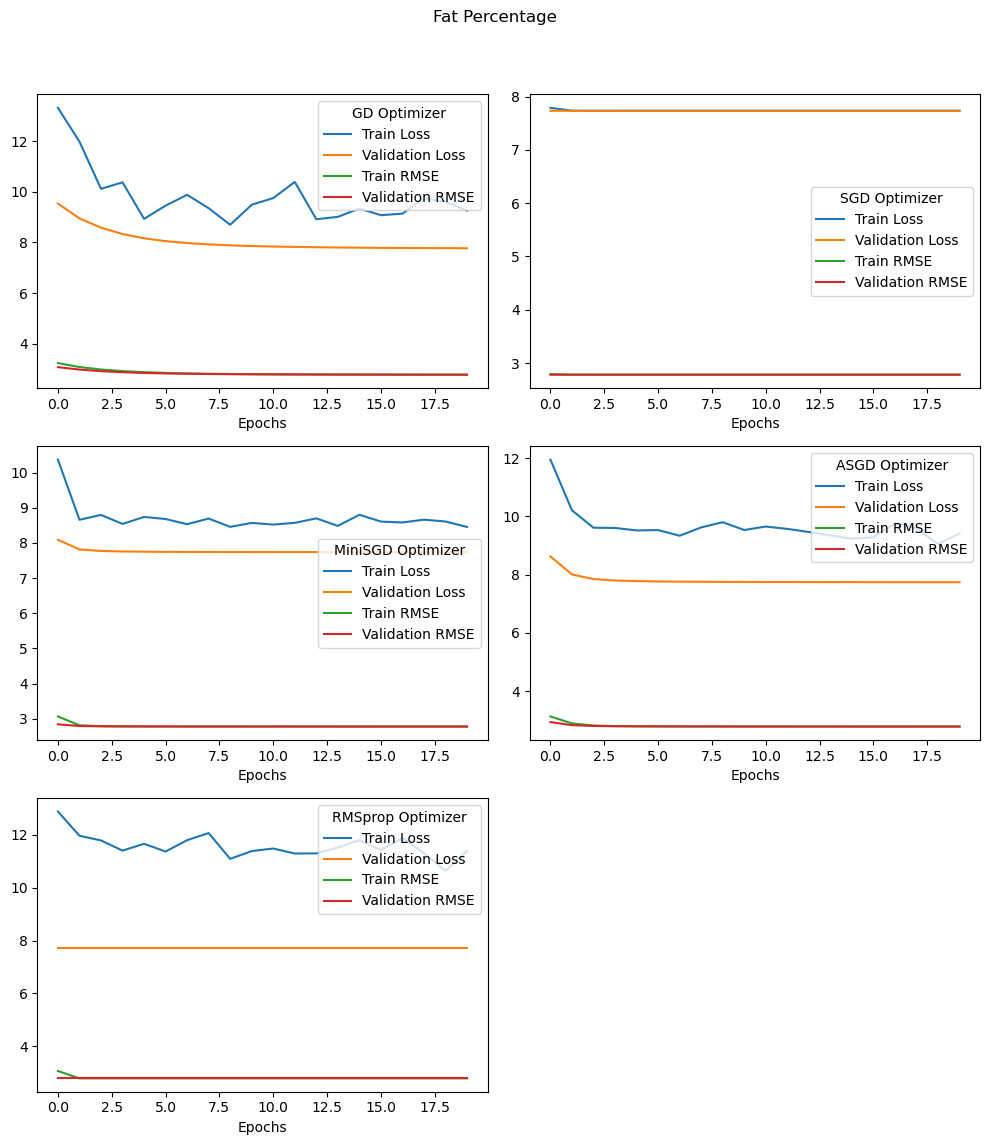

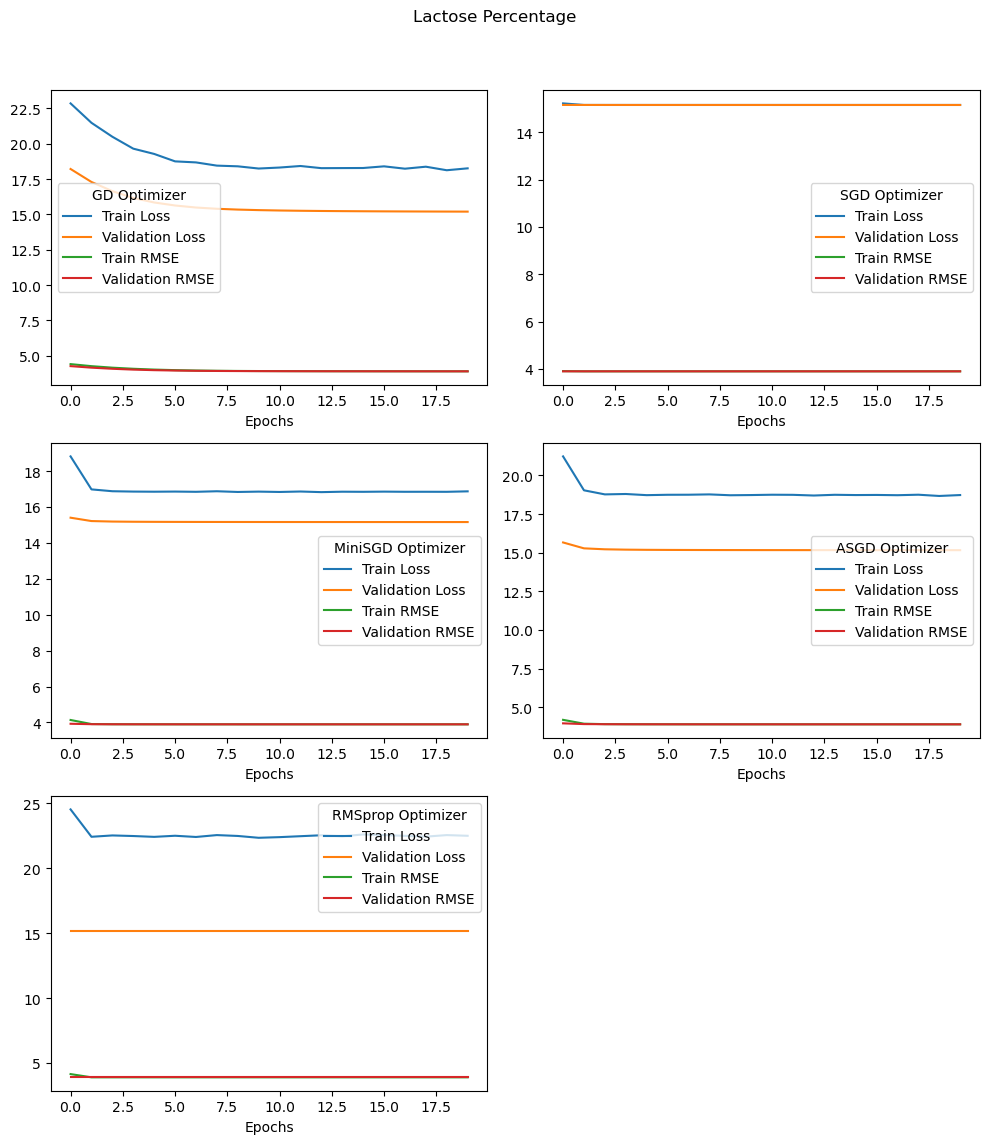

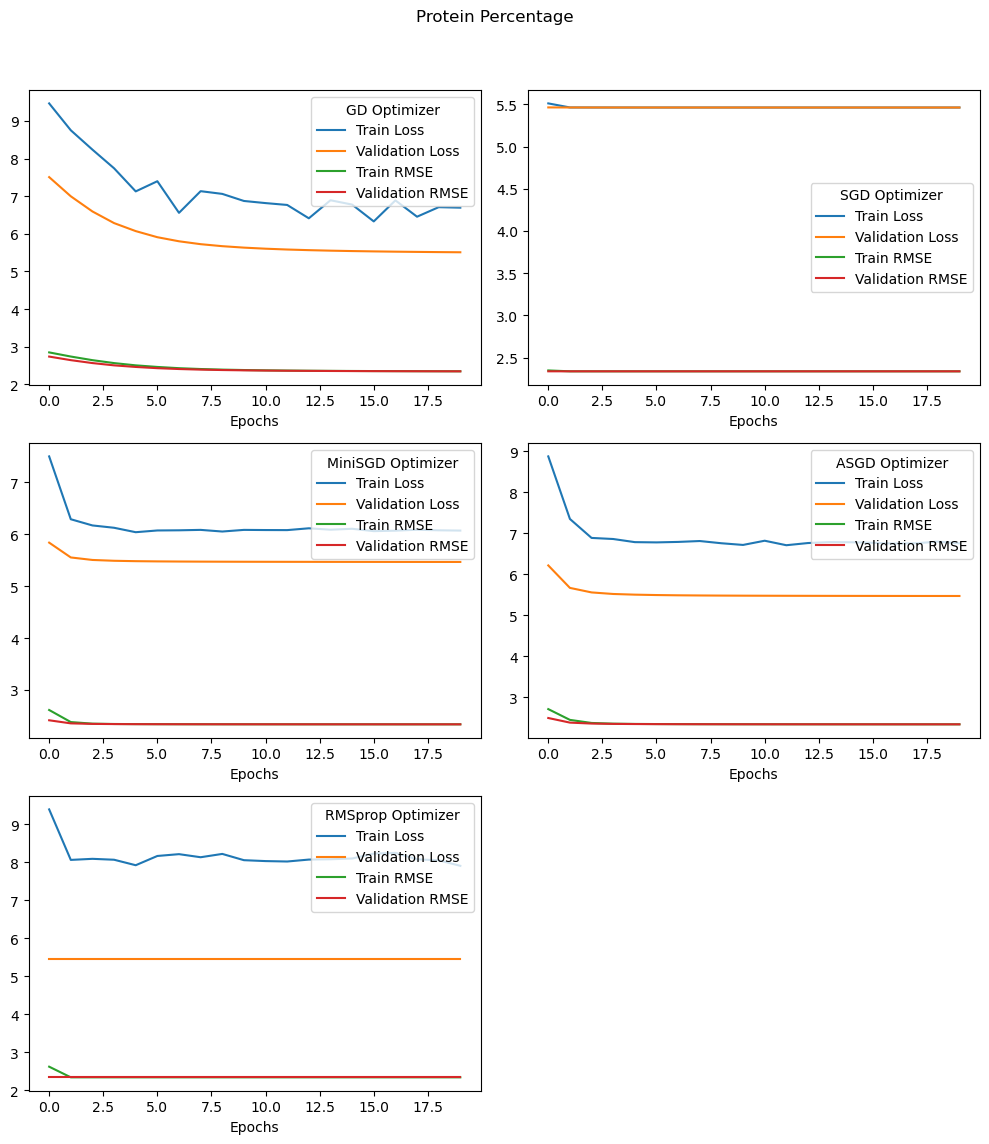

In [26]:
def plot_results(history, title):
    plt.figure(figsize=(10, 12))
    num_plots = len(history.keys())
    rows = 3
    cols = (num_plots + rows - 1) // rows
    
    for i, (nn_name, data) in enumerate(history.items(), 1):
        plt.subplot(rows, cols, i)
        plt.plot(data['metric_0'], label='Train Loss')
        plt.plot(data['metric_1'], label='Validation Loss')
        plt.plot(data['metric_2'], label='Train RMSE')
        plt.plot(data['metric_3'], label='Validation RMSE')
        plt.xlabel('Epochs')
        plt.legend(title=nn_name + ' Optimizer')
    
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
    plt.show()

# Plot results for each target variable
plot_results(avg_history_fat, "Fat Percentage")
plot_results(avg_history_lactose, "Lactose Percentage")
plot_results(avg_history_protein, "Protein Percentage")


## NEAT


 ****** Running generation 0 ****** 



C:\Users\jaime\AppData\Local\Temp\ipykernel_3504\3904604702.py:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  genome.fitness -= float((output[0] - xo) ** 2)


Population's average fitness: -6208.44113 stdev: 0.00000
Best fitness: -6208.44113 - size: (1, 0) - species 1 - id 1
Population's average fitness: -6208.44113 stdev: 0.00000
Best fitness: -6208.44113 - size: (1, 0) - species 1 - id 1
Average adjusted fitness: 0.000
Mean genetic distance 2.748, standard deviation 1.589
Population of 100 members in 3 species:
   ID   age  size   fitness   adj fit  stag
  ====  ===  ====  =========  =======  ====
     1    0    77  -6208.441    0.000     0
     2    0    17  -6208.441    0.000     0
     3    0     6  -6208.441    0.000     0
Total extinctions: 0
Generation time: 1.013 sec

 ****** Running generation 1 ****** 

Population's average fitness: -6110.23026 stdev: 408.25161
Best fitness: -3932.22790 - size: (1, 1) - species 2 - id 177
Population's average fitness: -6110.23026 stdev: 408.25161
Best fitness: -3932.22790 - size: (1, 1) - species 2 - id 177
Average adjusted fitness: 0.034
Mean genetic distance 3.277, standard deviation 1.579
Popul

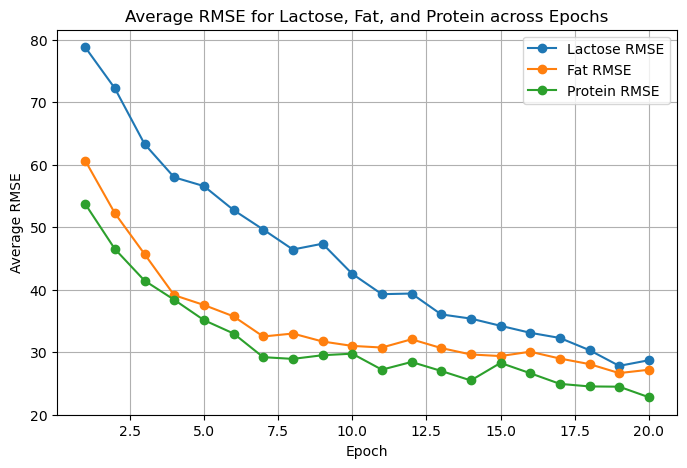

In [27]:
device = 'cpu'
temp_config_path = "temp_config_feedforward_xor"

def fitness_function(genomes, config, inputs, expected_outputs):
    inputs_list = inputs.tolist() if isinstance(inputs, torch.Tensor) else inputs
    outputs_list = expected_outputs.tolist() if isinstance(expected_outputs, torch.Tensor) else expected_outputs
    
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        genome.fitness = 0.0
        for xi, xo in zip(inputs_list, outputs_list):
            output = net.activate(xi)
            genome.fitness -= float((output[0] - xo) ** 2)

class StdOutReporter(neat.reporting.BaseReporter):
    def post_evaluate(self, config, population, species, best_genome):
        fit_mean = np.mean([g.fitness for g in population.values() if g.fitness is not None])
        fit_std = np.std([g.fitness for g in population.values() if g.fitness is not None])

        best_species_id = species.get_species_id(best_genome.key)
        best_fitness = float(best_genome.fitness)
        print('Population\'s average fitness: {0:3.5f} stdev: {1:3.5f}'.format(fit_mean, fit_std))
        print('Best fitness: {0:3.5f} - size: {1!r} - species {2} - id {3}'.format(best_fitness,
                                                                                     best_genome.size(),
                                                                                     best_species_id,
                                                                                     best_genome.key))

def run_neat_for_target(inputs, outputs, config, num_generations=15):
    pop = neat.Population(config)
    pop.add_reporter(neat.StdOutReporter(True))
    pop.add_reporter(StdOutReporter())
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)

    # Function to calculate fitness for each genome
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)
            genome.fitness = 0.0
            for xi, xo in zip(inputs, outputs):
                output = net.activate(xi)
                genome.fitness -= float((output[0] - xo) ** 2)

    # Run NEAT and collect fitness history
    fitness_history = []

    for gen in range(num_generations):
        pop.run(eval_genomes, 1)
        gen_fitnesses = [-genome.fitness for genome in pop.population.values() if genome.fitness is not None]
        gen_rmse = np.sqrt(np.mean(gen_fitnesses))
        fitness_history.append(gen_rmse)

    return fitness_history

# Load configuration file with UTF-8 encoding
config_path = "config-feedforward-xor.txt"
temp_config_path = "temp_config_feedforward_xor.txt"

# Read the configuration file with UTF-8 encoding, and handle errors
with open(config_path, 'r', encoding='utf-8', errors='replace') as f:
    content = f.read()

# Remove problematic characters
cleaned_content = ''.join(c for c in content if ord(c) < 128)

# Write cleaned content to a temporary file with UTF-8 encoding
with open(temp_config_path, 'w', encoding='utf-8') as f:
    f.write(cleaned_content)

# Load configuration using the temporary file
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation,
                            temp_config_path)

# Train NEAT models for each target
num_generations = 20
target_rmse = {
    'lactose': [[] for _ in range(num_generations)],
    'fat': [[] for _ in range(num_generations)],
    'protein': [[] for _ in range(num_generations)]
}

for fold_idx in range(len(X_train_kf)):
    X_train_fold = X_train_kf[fold_idx]
    y_fat_train_fold = y_fat_train_kf[fold_idx]
    y_lactose_train_fold = y_lactose_train_kf[fold_idx]
    y_protein_train_fold = y_protein_train_kf[fold_idx]

    # Convert data to numpy arrays
    X_train_fold_np = X_train_fold.cpu().numpy()
    y_fat_train_fold_np = y_fat_train_fold.cpu().numpy()
    y_lactose_train_fold_np = y_lactose_train_fold.cpu().numpy()
    y_protein_train_fold_np = y_protein_train_fold.cpu().numpy()
    
    # Run NEAT for each target
    lactose_rmse = run_neat_for_target(X_train_fold_np, y_lactose_train_fold_np, config, num_generations)
    fat_rmse = run_neat_for_target(X_train_fold_np, y_fat_train_fold_np, config, num_generations)
    protein_rmse = run_neat_for_target(X_train_fold_np, y_protein_train_fold_np, config, num_generations)
    
    for gen in range(num_generations):
        target_rmse['lactose'][gen].append(lactose_rmse[gen])
        target_rmse['fat'][gen].append(fat_rmse[gen])
        target_rmse['protein'][gen].append(protein_rmse[gen])

# Calculate average RMSE for each epoch across folds
average_rmse = {
    'lactose': [np.mean(rmses) for rmses in target_rmse['lactose']],
    'fat': [np.mean(rmses) for rmses in target_rmse['fat']],
    'protein': [np.mean(rmses) for rmses in target_rmse['protein']]
}

# Plot the RMSE values for each target
epochs = range(1, num_generations + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, average_rmse['lactose'], label='Lactose RMSE', marker='o')
plt.plot(epochs, average_rmse['fat'], label='Fat RMSE', marker='o')
plt.plot(epochs, average_rmse['protein'], label='Protein RMSE', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Average RMSE')
plt.title('Average RMSE for Lactose, Fat, and Protein across Epochs')
plt.legend()
plt.grid(True)
plt.show()

## Wilcoxon Signed-rank Test
##### Both models need to have the same amount of epochs

In [30]:
# Function to average RMSE values across optimizers
def average_rmse_across_optimizers(history):
    avg_rmse_train = []
    avg_rmse_valid = []
    for nn_name, folds_history in history.items():
        rmse_train_folds = []
        rmse_valid_folds = []
        for fold_name, metrics in folds_history.items():
            _, _, rmse_train, rmse_valid = metrics
            rmse_train_folds.append(rmse_train)
            rmse_valid_folds.append(rmse_valid)
        avg_rmse_train.append(np.mean(rmse_train_folds, axis=0))
        avg_rmse_valid.append(np.mean(rmse_valid_folds, axis=0))
    return np.mean(avg_rmse_train, axis=0), np.mean(avg_rmse_valid, axis=0)

# Average RMSE values across optimizers for each target
avg_rmse_train_fat, avg_rmse_valid_fat = average_rmse_across_optimizers(history_kfold_fat)
avg_rmse_train_lactose, avg_rmse_valid_lactose = average_rmse_across_optimizers(history_kfold_lactose)
avg_rmse_train_protein, avg_rmse_valid_protein = average_rmse_across_optimizers(history_kfold_protein)

# Use NEAT RMSE values (assuming they are precomputed)
neat_rmse_fat = average_rmse['fat']
neat_rmse_lactose = average_rmse['lactose']
neat_rmse_protein = average_rmse['protein']

# Perform Wilcoxon Signed-Rank Test
def perform_wilcoxon_test(avg_rmse_nn, neat_rmse, target_variable):
    # Ensure both lists have the same length for a valid test
    min_length = min(len(avg_rmse_nn), len(neat_rmse))
    avg_rmse_nn = avg_rmse_nn[:min_length]
    neat_rmse = neat_rmse[:min_length]
    
    stat, p_value = wilcoxon(avg_rmse_nn, neat_rmse)
    print(f"Wilcoxon test for {target_variable} RMSE: statistic={stat}, p-value={p_value}")

# Perform tests for each target variable
perform_wilcoxon_test(avg_rmse_valid_fat, neat_rmse_fat, "fat")
perform_wilcoxon_test(avg_rmse_valid_lactose, neat_rmse_lactose, "lactose")
perform_wilcoxon_test(avg_rmse_valid_protein, neat_rmse_protein, "protein")

Wilcoxon test for fat RMSE: statistic=0.0, p-value=0.5
Wilcoxon test for lactose RMSE: statistic=0.0, p-value=0.125
Wilcoxon test for protein RMSE: statistic=0.0, p-value=0.125
